This is code for stimulus-first Blocked training regime Planet version (YES/No Response button)
Here I want to change the variance or STD of inintial wigtht so I will have a range initial weight from Rich to Lazy
Also I want to see how models can converge

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
print(tf.__version__)

2.6.2


In [3]:
# Context Blocked Planet additive & Multiplicative batch size=1
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt 
import tensorflow as tf
import tensorflow_datasets as tfds
import random

# Read DATA from CSV file
Context_1_Input= pd.read_csv('D://OneDrive - UGent//Desktop//Mina//Simulation//Context1_Blocked.csv')
Context_2_Input= pd.read_csv('D://OneDrive - UGent//Desktop//Mina//Simulation//Context2_Blocked.csv')
Context_3_Input= pd.read_csv('D://OneDrive - UGent//Desktop//Mina//Simulation//Context3_Blocked.csv')

In [4]:
#Make shuffle input 
# I do not seprate train and test since I do not have enough data also I just want to compare the 
# performance of training regime on train data and get the representation of the models

Context_1_Input = Context_1_Input.sample(frac=1).reset_index(drop=True)
Context_2_Input = Context_2_Input.sample(frac=1).reset_index(drop=True)
Context_3_Input = Context_3_Input.sample(frac=1).reset_index(drop=True)


In [5]:
Context_1_Input.head(12)

,stimulus,stimulus_image,context,output
0,3,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
1,4,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
2,8,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0
3,3,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
4,6,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0
5,6,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0
6,1,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
7,7,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0
8,4,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
9,5,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0


In [6]:
concat_train = pd.concat([Context_1_Input, Context_2_Input, Context_3_Input], axis=0)
print('concat_train shape',concat_train.shape)
concat_train.head(10)

concat_train shape (144, 4)


,stimulus,stimulus_image,context,output
0,3,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
1,4,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
2,8,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0
3,3,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
4,6,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0
5,6,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0
6,1,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
7,7,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0
8,4,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1
9,5,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,0


In [7]:
concat_train_dummy=pd.get_dummies(concat_train,columns=['context'])
print('concat_train shape',concat_train_dummy.shape)
concat_train_dummy.head(10)

concat_train shape (144, 6)


,stimulus,stimulus_image,output,context_1,context_2,context_3
0,3,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1,0,0
1,4,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1,0,0
2,8,D://OneDrive - Ugent//Desktop//FWO//Mack email...,0,1,0,0
3,3,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1,0,0
4,6,D://OneDrive - Ugent//Desktop//FWO//Mack email...,0,1,0,0
5,6,D://OneDrive - Ugent//Desktop//FWO//Mack email...,0,1,0,0
6,1,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1,0,0
7,7,D://OneDrive - Ugent//Desktop//FWO//Mack email...,0,1,0,0
8,4,D://OneDrive - Ugent//Desktop//FWO//Mack email...,1,1,0,0
9,5,D://OneDrive - Ugent//Desktop//FWO//Mack email...,0,1,0,0


In [8]:
#then drop context collumn and output collumn

# context
Context_Input_Train = concat_train_dummy.drop(columns=['stimulus','stimulus_image', 'output'])

# Stimulus
#Stimulus_Input_Train = concat_train_dummy.drop(columns=['context_1','context_2','context_3','output','stimulus'])
Stimulus_Image_Train = concat_train_dummy ['stimulus_image'].values


# Only output or label collumn
Labels_Train = concat_train_dummy['output'].values


In [9]:
Stimulus_Image_Train


array(['D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//121.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//122.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//222.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//121.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//212.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//212.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//111.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//221.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//122.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack email//evolverep_sharing//stimuli1//211.png',
       'D://OneDrive - Ugent//Desktop//FWO//Mack e

In [10]:
Labels_Train

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

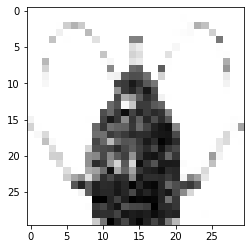

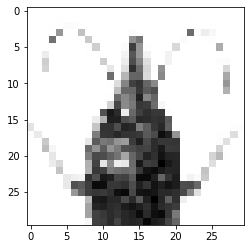

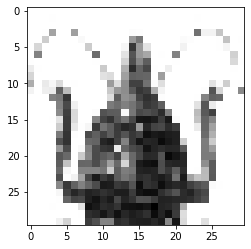

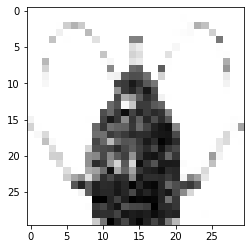

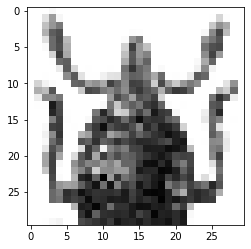

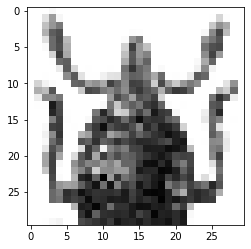

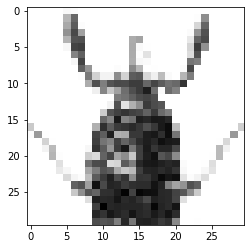

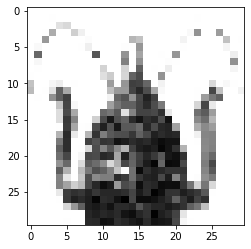

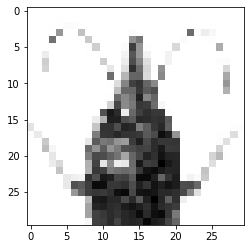

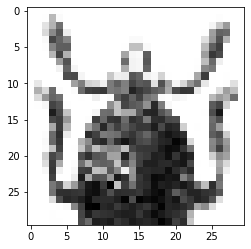

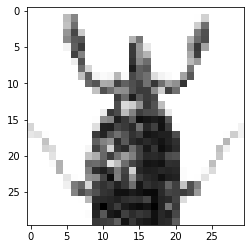

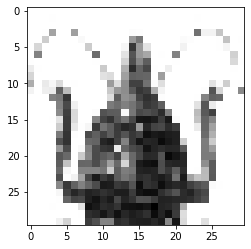

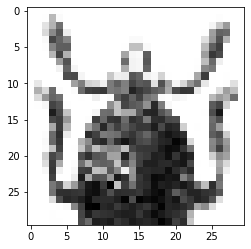

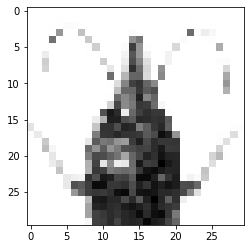

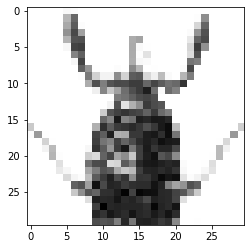

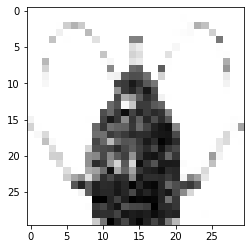

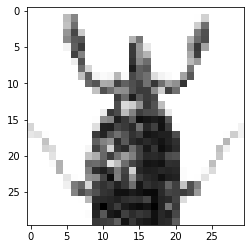

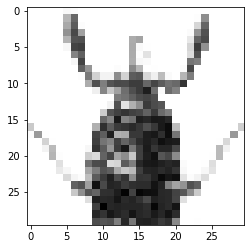

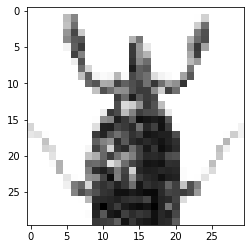

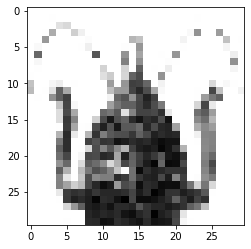

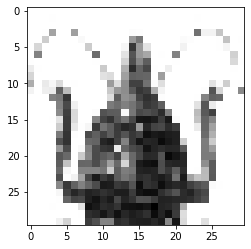

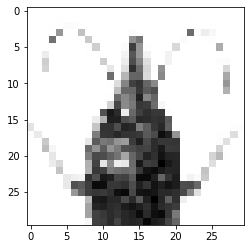

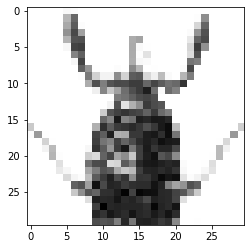

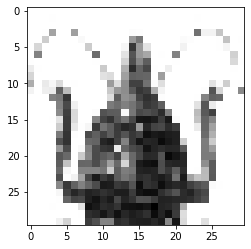

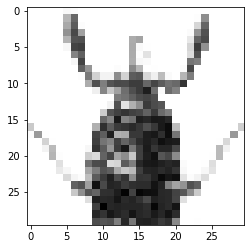

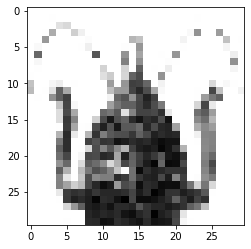

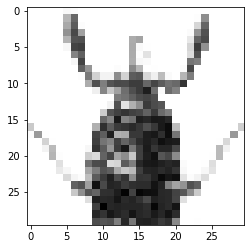

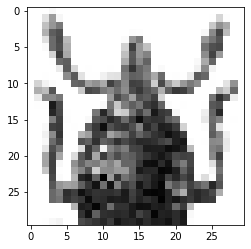

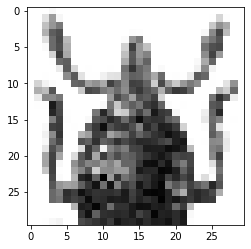

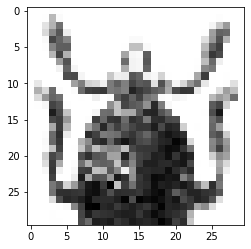

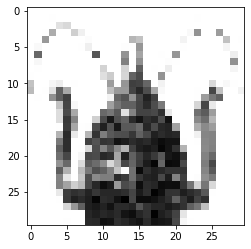

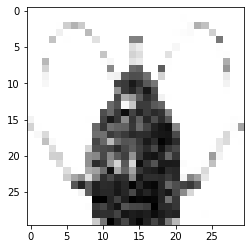

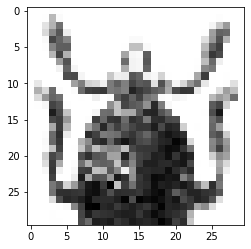

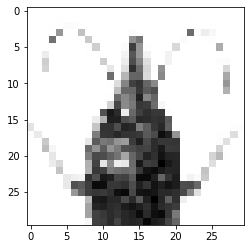

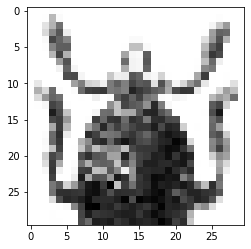

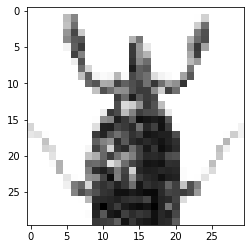

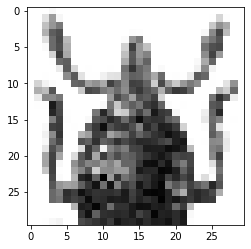

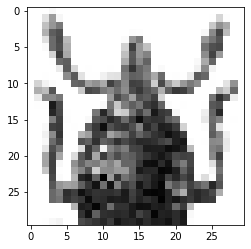

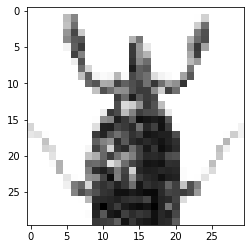

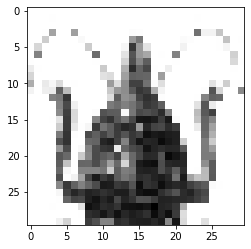

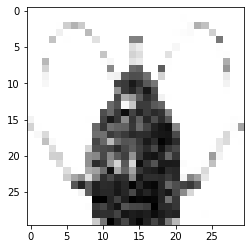

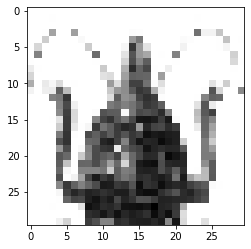

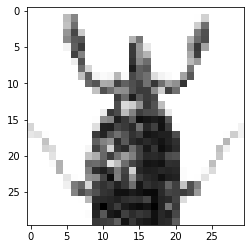

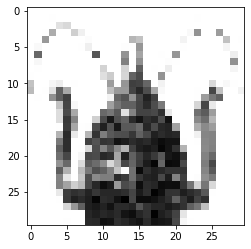

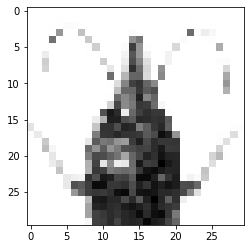

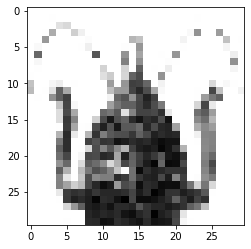

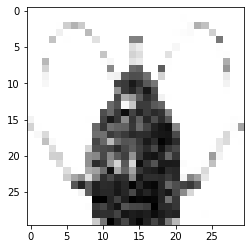

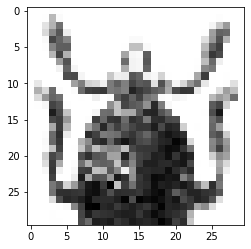

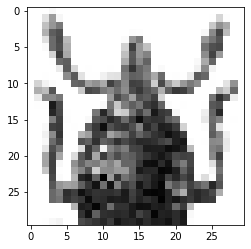

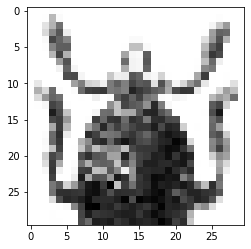

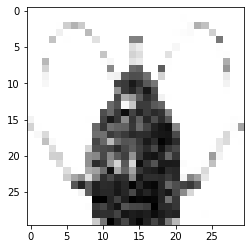

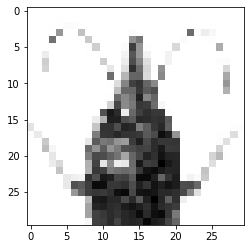

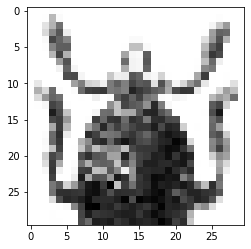

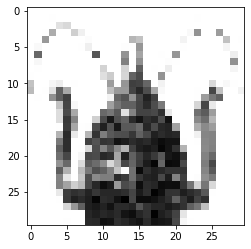

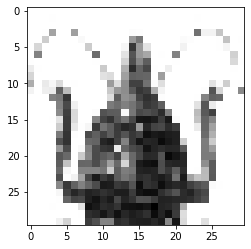

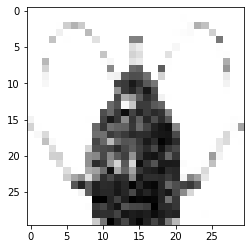

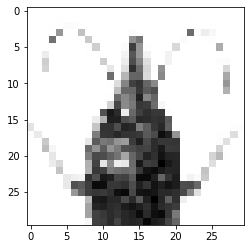

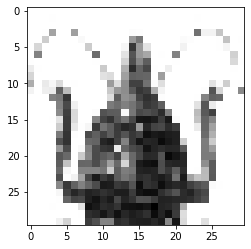

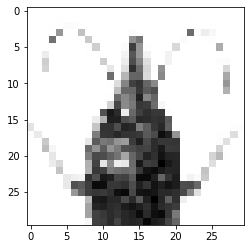

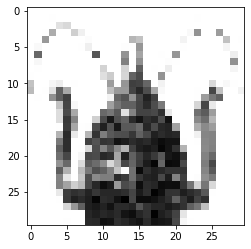

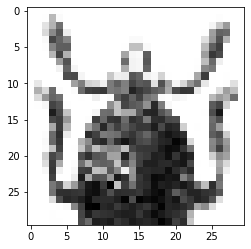

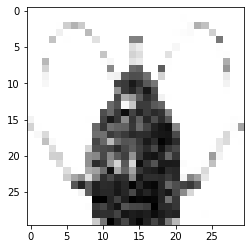

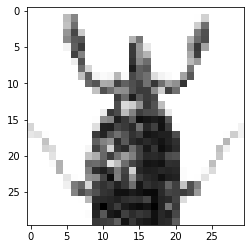

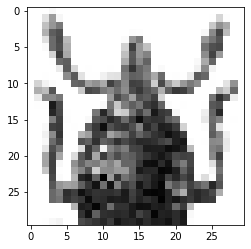

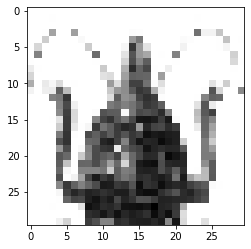

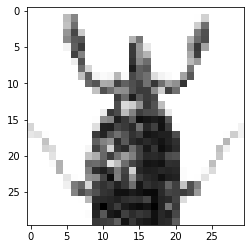

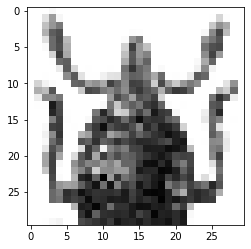

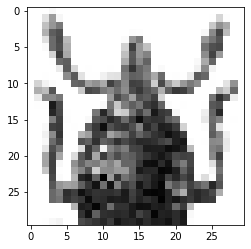

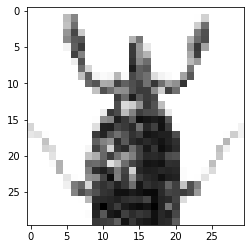

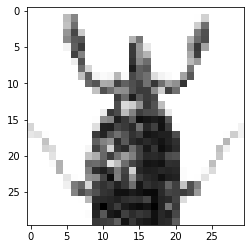

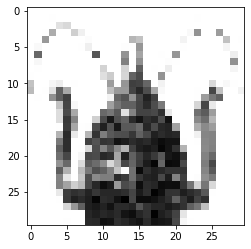

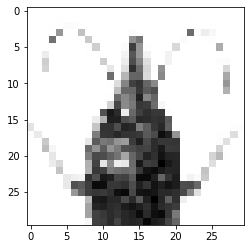

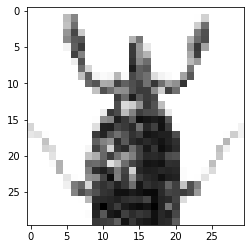

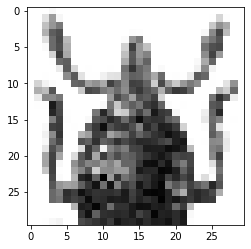

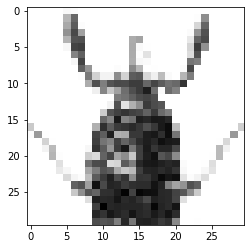

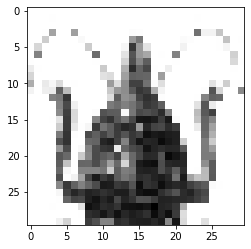

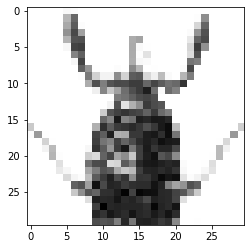

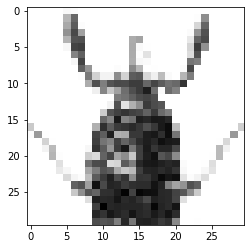

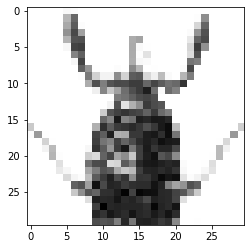

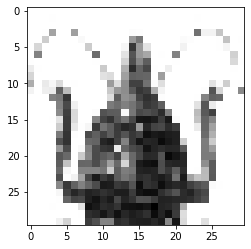

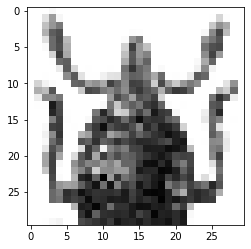

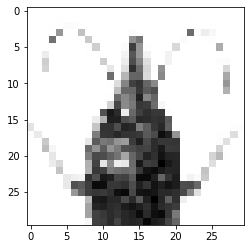

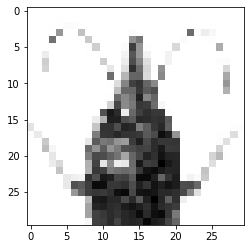

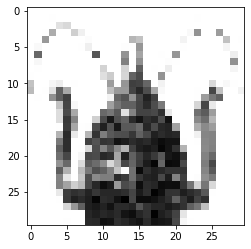

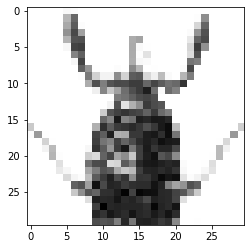

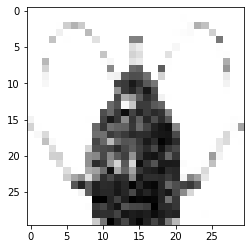

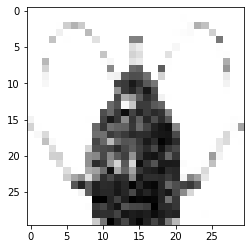

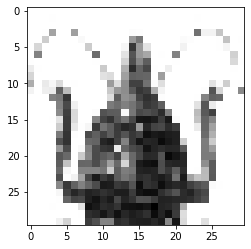

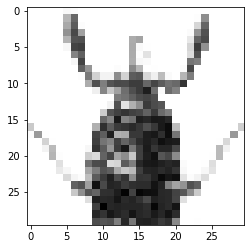

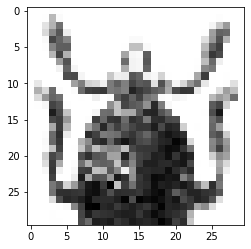

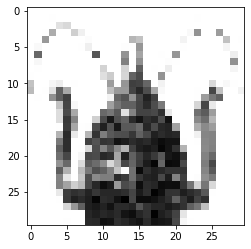

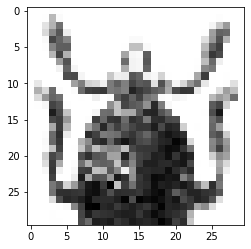

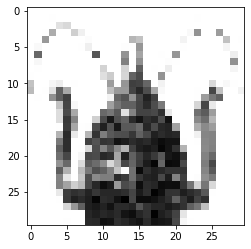

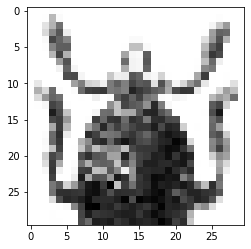

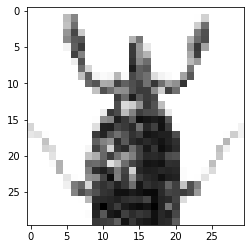

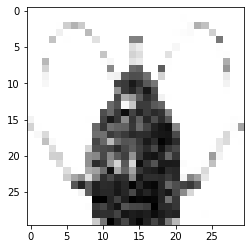

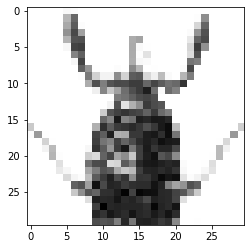

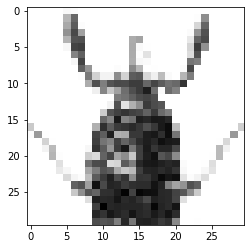

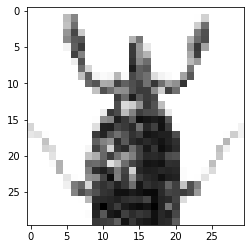

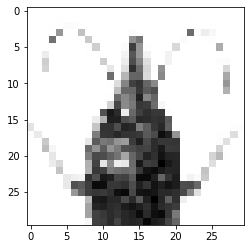

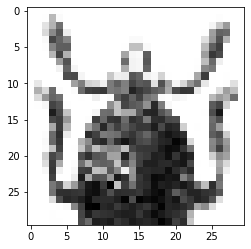

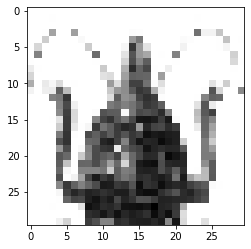

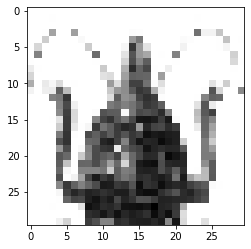

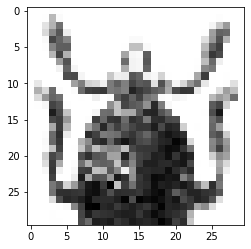

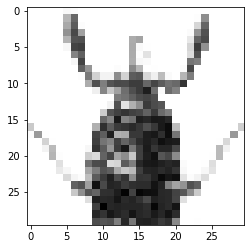

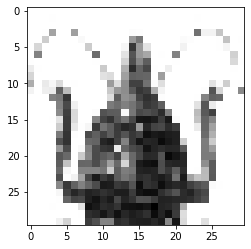

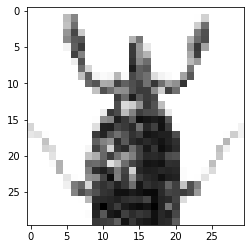

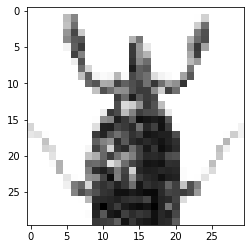

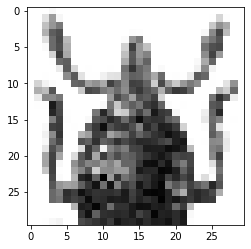

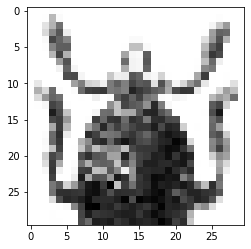

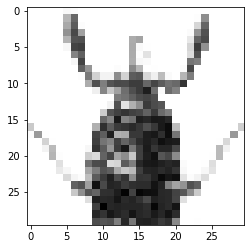

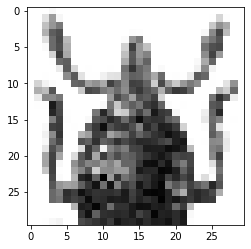

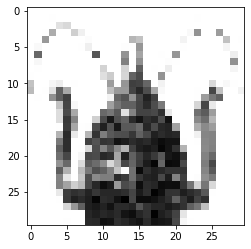

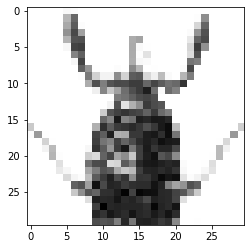

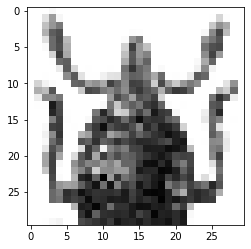

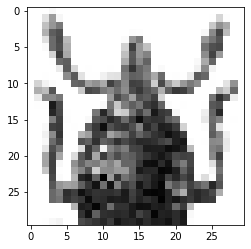

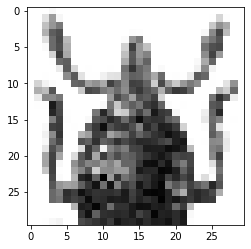

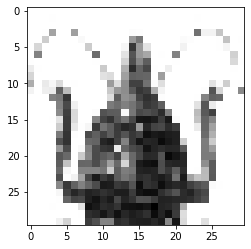

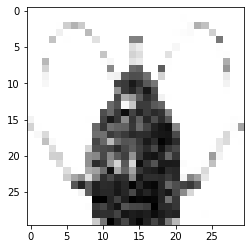

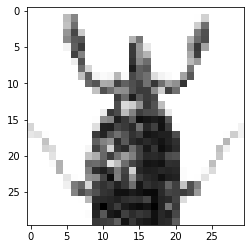

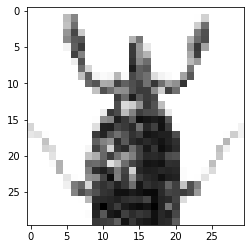

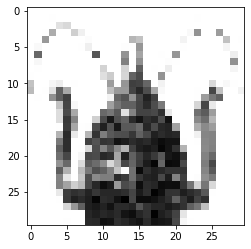

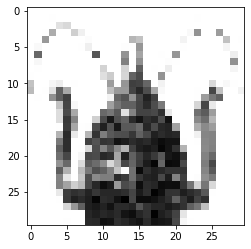

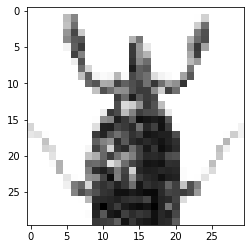

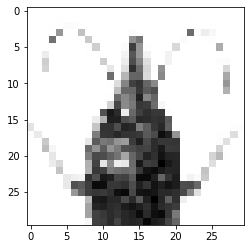

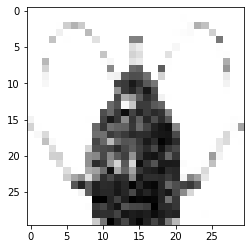

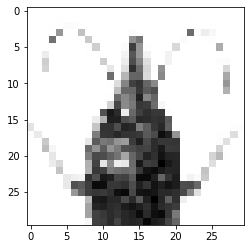

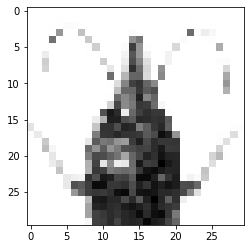

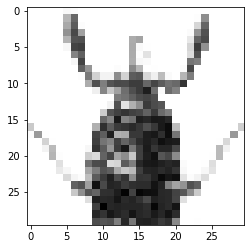

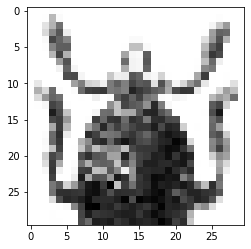

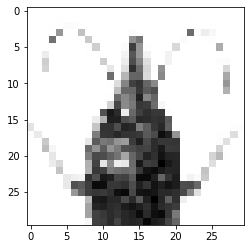

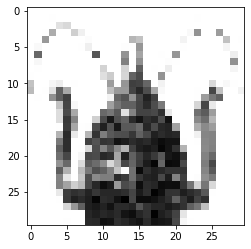

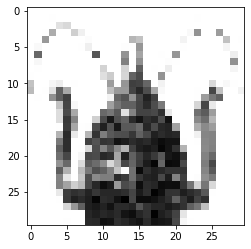

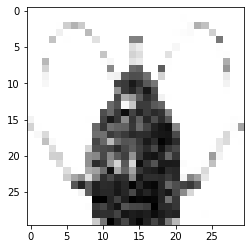

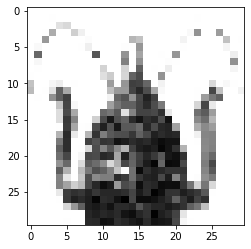

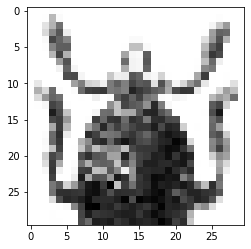

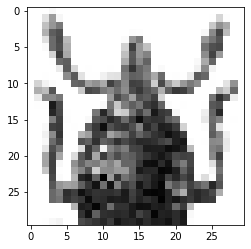

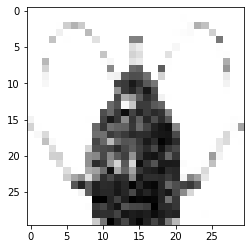

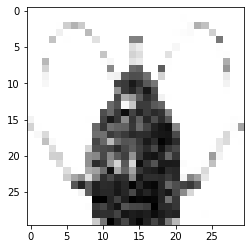

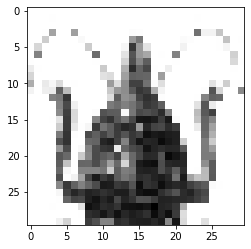

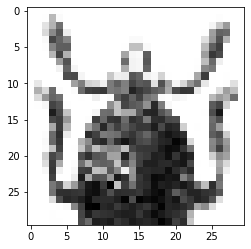

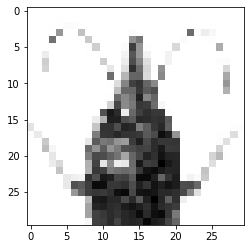

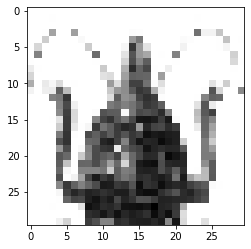

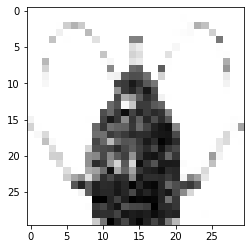

In [11]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


Stimulus_sizes = []
Stimulus_inputs = []
for s in Stimulus_Image_Train:
    #load image
    stimulus = cv2.imread(s)
    #resize image
    stimulus_resized = cv2.resize(stimulus, (30, 30))
    #convert to grayscale
    final_stimulus = cv2.cvtColor(stimulus_resized,cv2.COLOR_BGR2GRAY)
    #Reshape to one vector and scale values to [0,1]
    Stimulus_inputs.append(final_stimulus.reshape(-1)/255)
    #Plot the results
    plt.imshow(final_stimulus, cmap=plt.get_cmap('gray'))
    plt.show()
    Stimulus_sizes.append(final_stimulus.shape)
    

In [12]:
Stimulus_inputs = tf.convert_to_tensor(np.array(Stimulus_inputs))
print("\nResulting size of Stimulus inputs:")
print(np.shape(Stimulus_inputs)[1])


Resulting size of Stimulus inputs:
900


In [13]:
print(type(Stimulus_inputs))
print('Stimulus_inputs shape: ',Stimulus_inputs.shape)
print('Stimulus_inputs one member shape: ',Stimulus_inputs[1].shape)

print('-------------------------')
print(type(Stimulus_Image_Train))
print(Stimulus_Image_Train.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
Stimulus_inputs shape:  (144, 900)
Stimulus_inputs one member shape:  (900,)
-------------------------
<class 'numpy.ndarray'>
(144,)


In [14]:
# here I defien the model to see the structure and architecture 

###########################################################################################################
########################################### Stimulus Blocked Planet MULTIPLICATIVE ########################
###########################################################################################################
# Functional Keras API Additive Model
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

# Inputs
Stimulus_Inputs = keras.Input(shape=(900,), name= 'Stimulus')
Context_Inputs = keras.Input(shape=(3,), name='Context') # batch_size=48


# transforming stimulus and context
Stimulus_feature_1 = layers.Dense(100, activation="relu")(Stimulus_Inputs)
Stimulus_feature_2 = layers.Dense(100, activation="relu")(Stimulus_feature_1)
Context_feature = layers.Dense(100, activation="relu")(Context_Inputs)


# Mutiplication the output of previoues transformation
Multiplication = layers.Multiply()([Stimulus_feature_2,Context_feature])

# Output
outputs = layers.Dense(2, activation = 'softmax')(Multiplication)

# Model_1 is additive model
model_1 = Model(inputs=[Stimulus_Inputs,Context_Inputs], outputs=outputs, name='Stimulus_Blocked_Planet_Image_Model_Multipilicative')


Model: "Stimulus_Blocked_Planet_Image_Model_Multipilicative"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Stimulus (InputLayer)           [(None, 900)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          90100       Stimulus[0][0]                   
__________________________________________________________________________________________________
Context (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          10100       dense[0][0]                      
________________________________________________

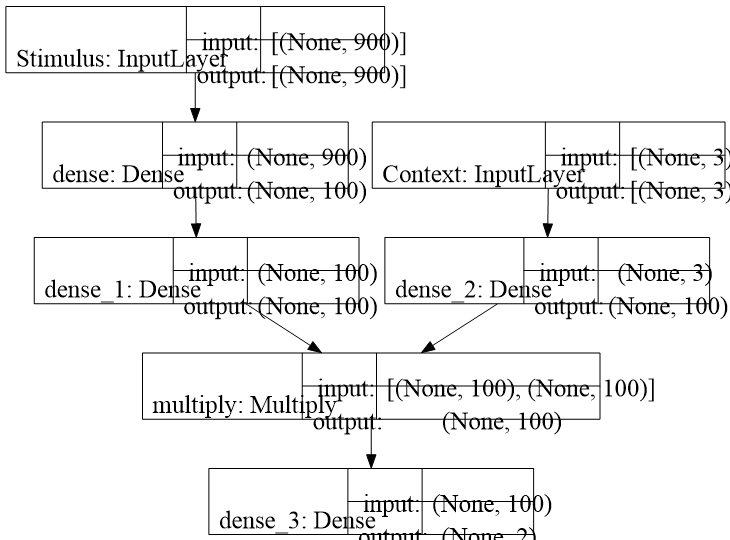

In [16]:
# summarize layers
print(model_1.summary())

# plot graph
keras.utils.plot_model(model_1, "Stimulus_Blocked_Planet_Model_Multiplicative.png", show_shapes=True)

# Defining number of epoch 

In [ ]:
#######################################################################################################
############################ Define Number of epoch ###################################################
#######################################################################################################

'''
I want to write a function to get specific threshold and stop training at that moment to extract the number of epoch.

'''
# Functional Keras API Additive Model
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.callbacks import Callback

# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95




def Stimulu_Blocked_Planet_Model ():
    '''
    the defualt initilizer is rich and good enough
    '''
    
    tf.keras.backend.clear_session()
    ACCURACY_THRESHOLD = 0.85

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > ACCURACY_THRESHOLD):
                print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
                self.model.stop_training = True

    callbacks = myCallback()
    #initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=std)
    #initializer = tf.keras.initializers.GlorotUniform(seed=42)
    # Inputs
    Stimulus_Input = keras.Input(shape=(900,), name= 'Stimulus')
    Context_Inputs = keras.Input(shape=(3,), name='Context') # batch_size=48
    

    # transforming stimulus and context
    Stimulus_feature_1 = layers.Dense(100, activation="relu", name='S1_Transformation')(Stimulus_Input)
                                      #kernel_initializer=initializer)
    
    Stimulus_feature_2 = layers.Dense(100, activation="relu", name='S2_Transformation')(Stimulus_feature_1)
                                      #kernel_initializer=initializer)
    
    Context_feature = layers.Dense(100, activation="relu", name='C_Transformation')(Context_Inputs)
                                  # kernel_initializer=initializer)
    

    # Mutiplication the output of previoues transformation
    Multiplication = layers.Multiply(name = "Second_Hidden_SCMultiplication")([Stimulus_feature_2, Context_feature])

    # Output
    outputs = layers.Dense(2, activation = 'softmax')(Multiplication)

    # Model_1 is additive model
    model_1 = Model(inputs=[Stimulus_Input,Context_Inputs], outputs=outputs, name='Stimulus_Blocked_Planet_Model_Multipilicative')


    # maybe I need to change the learning rate in ADAM optimizer
    optimizer = keras.optimizers.Adam(lr=0.0001)
    model_1.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']) 
    
    # early stopping to see how many episode or epoch each netwrok needs
    #early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6,
                                                      #verbose=1,restore_best_weights='True', min_delta=0.08)
    
    
    
    # I can have a list of metric like 
    # Evaluate the model before training with data similar to train data to see the difference before training and after training
    #print('subject {} pre train evaluation'.format(i))
    loss_before, accuracy_before = model_1.evaluate(x=[Stimulus_inputs, Context_Input_Train],y=Labels_Train) # , batch_size=48
    
    # Train the model
    EPOCHS = 10000
    history = model_1.fit(x=[Stimulus_inputs,Context_Input_Train], 
                          y=Labels_Train, 
                          epochs = EPOCHS, 
                          shuffle=False, 
                          batch_size=1,
                          callbacks = callbacks)
    
    # Evaluate the model after training:
    #print('subject {} afyter train evaluation'.format(i))
    loss_after, accuracy_after = model_1.evaluate(x=[Stimulus_inputs,Context_Input_Train], y=Labels_Train)
    n_epoch= len(history.history['loss']) 
    
    return accuracy_before,accuracy_after, n_epoch, model_1

In [ ]:
##############################################################################################################################
############################## I want to run this model 500 times to measure how many epochs do I need #######################
##############################################################################################################################
# different std list
#std_list=[0.004, 0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 1.0, 2.0, 3.0]
dict_history={}

dict_history['ACC_Before']=[]
dict_history['ACC_After']=[]
dict_history['n_epoch']=[]
dict_history['model']=[]
for i in range(500):
    print('I is :', i)
    print('\n \n')
    accuracy_before,accuracy_after, n_epoch, model_1=Stimulu_Blocked_Planet_Model()
    dict_history['ACC_Before'].append(accuracy_before)
    dict_history['ACC_After'].append(accuracy_after)
    dict_history['n_epoch'].append(n_epoch)
    dict_history['model'].append(model_1)
        

In [ ]:
# Save The Dict History
SBP_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//'

# I want to drop Item in dict_history that is related to the model and then make a dataframe from dictinary the dictinary.
dict_history_copy = dict_history.copy()
dict_history_copy.pop('model')

# Making pandas dataframe from my dictionary
df_dict_history_copy = pd.DataFrame(dict_history_copy)


# Save df_dict_history_copy
df_dict_history_copy.to_csv(SBP_path+'SBP_Number_Epoch.csv')


In [ ]:
# Load this dataframe:
# df_dict_history_copy.to_csv(SBP_path+'SBP_Number_Epoch.csv')
SBP_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//'

df_dict_history_copy = pd.read_csv(SBP_path+'SBP_Number_Epoch.csv')
df_dict_history_copy.head()

In [ ]:
avearge_epoch = int(df_dict_history_copy.loc[:,'n_epoch'].mean())

print('avearge number of epoch that is needed: ', avearge_epoch)

avearge_acc_before = df_dict_history_copy.loc[:,'ACC_Before'].mean()
print('avearge acc before training: ', avearge_acc_before)

avearge_acc_after = df_dict_history_copy.loc[:,'ACC_After'].mean()
print('avearge acc after training: ', avearge_acc_after)

In [17]:
# average number of epoch that is needed:
# 15 epoch is the number of pochs which I needed to train my model for stimulus Blocked with Planet group to 
# achieve the accuracy of 85%. So I will train all other model the same times
avearge_epoch=15
print('I will train the NN for {} numbers of epoch for all groups'.format(avearge_epoch))

I will train the NN for 15 numbers of epoch for all groups


# Using TensorBoard for visualization

In [25]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [26]:
import datetime
# Clear any logs from previous runs
#rm -rf ./logs/

In [27]:
tensorboard --logdir=runs


Reusing TensorBoard on port 6006 (pid 17584), started 4:06:06 ago. (Use '!kill 17584' to kill it.)

# Defualt wight initilizer 

In [17]:
#################################################################################################################
############################################# Default Initilizer ################################################
#################################################################################################################
# Defualt initilizer based on number of input and output on each tensor
def Model_Stimulu_Blocked_Planet(epoch):
    '''
    the defualt initilizer is rich and good enough 
    I want to use the same seed for all models 
    '''

    tf.keras.backend.clear_session()
    
    # Inputs
    Stimulus_Input = keras.Input(shape=(900,), name= 'Stimulus')
    Context_Inputs = keras.Input(shape=(3,), name='Context') # batch_size=48
    
    # transforming stimulus and context
    Stimulus_feature_1 = layers.Dense(100, activation="relu", name='S1_Transformation')(Stimulus_Input)
    Stimulus_feature_2 = layers.Dense(100, activation="relu", name='S2_Transformation')(Stimulus_feature_1)
    Context_feature = layers.Dense(100, activation="relu", name='C_Transformation')(Context_Inputs)
    
    # Mutiplication the output of previoues transformation
    Multiplication = layers.Multiply(name = "Second_Hidden_SCMultiplication")([Stimulus_feature_2, Context_feature])

    # Output
    outputs = layers.Dense(2, activation = 'softmax')(Multiplication)

    # Model_1 is additive model
    model = Model(inputs=[Stimulus_Input,Context_Inputs], outputs=outputs, name='Stimulus_Blocked_Planet_Model_Multipilicative')


    # maybe I need to change the learning rate in ADAM optimizer
    optimizer = keras.optimizers.Adam(lr=0.0001)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    ###############################################
    ########## Using TensorBoard ##################
    ################################################
    #log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    #tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


    # I can have a list of metric like 
    # Evaluate the model before training with data similar to train data to see the difference before training and after training
    #print('subject {} pre train evaluation'.format(i))
    loss_before, accuracy_before = model.evaluate(x=[Stimulus_inputs, Context_Input_Train],y=Labels_Train) # , batch_size=48
    
    # Train the model
    EPOCHS = epoch
    history = model.fit(x=[Stimulus_inputs,Context_Input_Train], 
                          y=Labels_Train, 
                          epochs = EPOCHS, 
                          shuffle=False, 
                          batch_size=1
                          #callbacks=[tensorboard_callback]
                       )
    
    # Evaluate the model after training:
    #print('subject {} afyter train evaluation'.format(i))
    loss_after, accuracy_after = model.evaluate(x=[Stimulus_inputs,Context_Input_Train], y=Labels_Train)
    return accuracy_before, loss_before, accuracy_after,loss_after, model, history

dict_models={}
dict_models['ACC_Before']=[]
dict_models['ACC_After']=[]
dict_models['Loss_Before']=[]
dict_models['Loss_After']=[]
dict_models['model']=[]

# How many epoch do I have at the end define the number of collumns in this dataframe
# Number of Epochs=? average epoch
df_accuracy = pd.DataFrame(columns = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10',
                                      'E11', 'E12', 'E13', 'E14', 'E15'])

df_loss = pd.DataFrame(columns = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10',
                                  'E11', 'E12', 'E13', 'E14', 'E15'])
avearge_epoch=15
for i in range(1000):
    print('Subject ', i)
    accuracy_before, loss_before, accuracy_after, loss_after, model, history = Model_Stimulu_Blocked_Planet(avearge_epoch)
    dict_models['ACC_Before'].append(accuracy_before)
    dict_models['ACC_After'].append(accuracy_after)
    dict_models['Loss_Before'].append(loss_before)
    dict_models['Loss_After'].append(loss_after)
    dict_models['model'].append(model)
    df_accuracy.loc[len(df_accuracy)] = history.history['accuracy']
    df_loss.loc[len(df_loss)] = history.history['loss']

Subject  0
1/5 [=====>........................] - ETA: 0s - loss: 0.6892 - accuracy: 0.4688

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6436 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5721 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5412 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6955 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5848 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5528 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5556: 0s - loss: 0.6744 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6667: 0s - loss: 0.6140 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.7500
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6362 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6124 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5571 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6448 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.7431: 0s - loss: 0.5419 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5804 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5533 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5253 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6596 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5726 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.7292: 0s - loss: 0.6470 - accuracy: 0.76
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.574

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.5278
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.5833
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6122 - accuracy: 0.6875
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.6250
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6905 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6218 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5974 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5407 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6917 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6515 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6336 - accuracy: 0.6528
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6127 - accuracy: 0.6736
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.6875
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5626 - accuracy: 0.6875
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6216 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5941 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.7986: 0s - loss: 0.4116 - accuracy: 
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5290 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6593 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6462 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6098 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5857 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5976 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.7014
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.6042
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5275 - accuracy: 0.7153
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6901 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6182 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6158 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5947 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7006 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.4722
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6878 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.7014: 0s - loss: 0.6750 - accuracy: 0.70
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5726 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5416 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.511

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6399 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5973 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5721 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6937 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6237 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5702 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5397 - accuracy: 0.7986: 0s - loss: 0.4488 - accuracy: 0.
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5100 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6970 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6477 - accuracy: 0.7708: 0s - loss: 0.6372 - accuracy: 0.81
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6294 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.549

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6673 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6341 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5882 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6014 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6395 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5900 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5558 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6794 - accuracy: 0.58 - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5553 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.6597: 0s - loss: 0.6459 - accuracy: 0.72
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6218 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6001 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5439 - accuracy: 0.78 - 0s 1ms/step - loss: 0.5751 - accuracy: 0.7222
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6902 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5828 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5533 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5226 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6961 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6984 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6121 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.5626 - accuracy: 0.85 - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6404 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.6875: 0s - loss: 0.6216 - accuracy: 0.73
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5917 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5656 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7500: 0s - loss: 0.2938 - accuracy: 
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5436 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5912 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5356 - accuracy: 0.7153
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.6042: 0s - loss: 0.6704 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6483 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6294 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.6806
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5261 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6853 - accuracy: 0.644 - 0s 1ms/step - loss: 0.6888 - accuracy: 0.6111
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6445 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6043 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.7017 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.6597: 0s - loss: 0.6118 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6409 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6215 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5450 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6721 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6997 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6445 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5728 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5254 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5764TA: 0s - loss: 0.6886 - accuracy: 0.56
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6593 - accuracy: 0.6944: 0s - loss: 0.6280 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6049 - accuracy: 0.7778
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6330 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5532 - accuracy: 0.83 - 0s 1ms/step - loss: 0.5813 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.6528
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6345 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6134 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6361 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5678 - accuracy: 0.94 - ETA: 0s - loss: 0.5911 - accuracy: 0.85 - 0s 1ms/step - loss: 0.6150 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5909 - accuracy: 0.8194
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.7000 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.4792
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.5278
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6558 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6186 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5932 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5291 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6976 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6109 - accuracy: 0.74 - 0s 1ms/step - loss: 0.6310 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6086 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5566 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.6597TA: 0s - loss: 0.6743 - accuracy: 0.69
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6661 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5978 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5703 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5407 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.6806: 0s - loss: 0.6693 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5634 - accuracy: 0.7847: 0s - loss: 0.5274 - accuracy: 0.84
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6233 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6966 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5626 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5350 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6463 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6007 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5467 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6005 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5494 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5391 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.6111: 0s - loss: 0.6732 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.6944: 0s - loss: 0.6532 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.7153: 0s - loss: 0.6298 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6313 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.7847: 0s - loss: 0.5848 - accuracy: 0.83
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5837 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.6389 ETA: 0s - loss: 0.6667 - accuracy: 0.71
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6346 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6114 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5859 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5563 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6593 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6438 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6588 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6439 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.7639TA: 0s - loss: 0.6111 - accuracy: 0.83
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5810 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.5384 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.7007 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6360 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.8125: 0s - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.7014: 0s - loss: 0.6481 - accuracy: 0.73
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.7500: 0s - loss: 0.5621 - accuracy: 0.80
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.7778: 0s - loss: 0.4763 - accuracy: 0.
Epoch 9/1

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.6875: 0s - loss: 0.6117 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6235 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5956 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5654 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4764 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6986 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6111 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5305 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5662 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.8194: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6593 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5559 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6938 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6267 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5515 - accuracy: 0.7292
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.6667: 0s - loss: 0.6257 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6027 - accuracy: 0.7500: 0s - loss: 0.4883 - accuracy
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6868 - accuracy: 0.509 - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6330 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6629 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6298 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6086 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5593 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6736: 0s - loss: 0.6476 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6510 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.7361: 0s - loss: 0.5960 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6114 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5607 - accuracy: 0.8056
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5899 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5606 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6962 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6041 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.6875
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.7153: 0s - loss: 0.6336 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6415 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6215 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5991 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5743 - accuracy: 0.7569: 0s - loss: 0.4067 - accuracy: 1.00 - ETA: 0s - loss: 0.4977 - accuracy: 0.
Epoch 9

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.7023 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6988 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6489 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6287 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5484 - accuracy: 0.7083
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6588 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6959 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5486: 0s - loss: 0.6796 - accuracy: 0.58
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6439 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6271 - accuracy: 0.7292: 0s - loss: 0.6143 - accuracy: 0.75
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5732 - accuracy: 0.7500: 0s - loss: 0.4242 - accuracy: 
Epoch 9/15


C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6137 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.6875
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5625 - accuracy: 0.6875
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.6944
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6199 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5720 - accuracy: 0.80 - 0s 1ms/step - loss: 0.5932 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6438 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6235 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6001 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5482 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6411 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5477 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.6944: 0s - loss: 0.6337 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6197 - accuracy: 0.7500: 0s - loss: 0.5741 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.7847: 0s - loss: 0.4799 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.8056
Epoch 9/15
144/

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6510 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5255 - accuracy: 0.7500
Epoch 10/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.7708

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6488 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.7153: 0s - loss: 0.6251 - accuracy: 0.73
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5940 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.570

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6176 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5050 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6186 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6945 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6074 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5800 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6901 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6475 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5824 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6280 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6061 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5804 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.5347: 0s - loss: 0.6604 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5359 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6457 - accuracy: 0.7361: 0s - loss: 0.6250 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.7431: 0s - loss: 0.6013 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5946 - accuracy: 0.81 - 0s 1ms/step - loss: 0.6125 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5928 - accuracy: 0.7708: 0s -

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.5625: 0s - loss: 0.6450 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5532 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6197 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6005 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5792 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5625: 0s - loss: 0.6784 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6386 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5914 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6902 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5671 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5389 - accuracy: 0.7986: 0s - loss: 0.4400 - accuracy: 0.
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5105 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.6944
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6404 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5948 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6446 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6244 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6007 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5419 - accuracy: 0.77 - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6448 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6012 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5762 - accuracy: 0.7639: 0s - loss: 0.4285 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5500 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5234 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5366 - accuracy: 1.00 - ETA: 0s - loss: 0.5783 - accuracy: 0.87 - ETA: 0s - loss: 0.6004 - accuracy: 0.85 - 0s 1ms/step - loss: 0.6175 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5595 - accura

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6227 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5989 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5739 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5218 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6511 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6338 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6122 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5847 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.5341 - accuracy: 0.82 - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.6458: 0s - loss: 0.6401 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.7292: 0s - loss: 0.6119 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6009 - accuracy: 0.7708: 0s - loss: 0.4679 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5741 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5445 - accuracy: 0.7778
Epoch 9/15
144/

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.7431: 0s - loss: 0.6149 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5679 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5387 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7014
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7014
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.6111
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6303 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6901 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6271 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6029 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5924 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5661 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6132 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5351 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6845 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6293 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6056 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5771 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5479 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.4933 - accuracy: 0.79 - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6941 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6835 - accuracy: 0.68 - 0s 1ms/step - loss: 0.6856 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6622 - accuracy: 0.80 - 0s 1ms/step - loss: 0.6686 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6439 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6265 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.8333
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6869 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5679 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6330 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5509 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5917 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5628 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5325 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.5625: 0s - loss: 0.6760 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5973 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5684 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5353 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5559 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5217 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6994 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7292
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6269 - accuracy: 0.82 - 0s 1ms/step - loss: 0.6415 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6345 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6158 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.6875
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.6875
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7292
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6607 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6475 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5775 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5214 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6679 - accuracy: 0.66 - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6406 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6186 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5940 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5636 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6694 - accuracy: 0.69 - 0s 1ms/step - loss: 0.6751 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6593 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6399 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6183 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5675 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5771 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5498 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.6389: 0s - loss: 0.6827 - accuracy: 0.65
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6645 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5935 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.567

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.4375
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6482 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6290 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6061 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5794 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6875: 0s - loss: 0.6639 - accuracy
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5564 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6919 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.7847
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6209 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5967 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5356 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5508 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6962 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6122 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5863 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5318 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6889 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5919 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5367 - accuracy: 0.7569: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6721 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6959 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6651 - accuracy: 0.5903
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6736: 0s - loss: 0.6332 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5509 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6051 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5835 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5622 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5377 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6461 - accuracy: 0.72 - 0s 1ms/step - loss: 0.6568 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6415 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.7014: 0s - loss: 0.6009 - accuracy: 0.72
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.7014: 0s - loss: 0.5468 - accuracy: 0.72
E

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6918 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6417 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6407 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.7569: 0s - loss: 0.5236 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5410 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6887 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6526 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6070 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5057 - accuracy: 0.87 - ETA: 0s - loss: 0.5501 - accuracy: 0.82 - 0s 1ms/step - loss: 0.5794 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5509 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.7917
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.4722
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.4931
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.5903: 0s - loss: 0.6230 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6024 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5483 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.5833
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6083 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5799 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5469 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.7153: 0s - loss: 0.6354 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.7569: 0s - loss: 0.6325 - accuracy: 0.77
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6256 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.8194
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6619 - accuracy: 0.6667 ETA: 0s - loss: 0.6473 - accuracy: 0.58 - ETA: 0s - loss: 0.6569 - accuracy: 0. - 0s 1ms/step - loss: 0.6686 - accuracy: 0.6111
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.6806: 0s - loss: 0.6282 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6415 - accuracy: 0.7292: 0s - loss: 0.6010 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6241 - accuracy: 0.7292
Epoch 8/15
144/144 [=======

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.51 - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.6319
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6394 - accuracy: 0.6458
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.7569: 0s - loss: 0.5483 - accuracy: 0.85 - ETA: 0s - loss: 0.5782 - accuracy: 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6902 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6300 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6061 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6939 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6625 - accuracy: 0.5833
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.6528
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.6736
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6005 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5733 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5464 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.7000 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.53 - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6725 - accuracy: 0.61 - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.6944: 0s - loss: 0.6450 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6394 - accuracy: 0.7708: 0s - loss: 0.5920 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - ETA: 0s - los

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.2917
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6731 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6554 - accuracy: 0.6319: 0s - loss: 0.6021 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.6875: 0s - loss: 0.5477 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5806 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5529 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================]

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.4028
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5864 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6282 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6057 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5794 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6111
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6250
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6462 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6257 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7153
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5915 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6937 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5994 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5475 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6119 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5233 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5833: 0s - loss: 0.6742 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6410 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5748 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5491 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6265 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.7361: 0s - loss: 0.6281 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6087 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5519 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5230 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.6944
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.7083
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5941 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5676 - accuracy: 0.7778: 0s - loss: 0.4853 - accuracy: 0.
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5400 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.6597: 0s - loss: 0.6544 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5846 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5483 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4794 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6471 - accuracy: 0.72 - 0s 1ms/step - loss: 0.6598 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6215 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5603 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5306 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.5347
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5318 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.5069: 0s - loss: 0.6632 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6329 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5850 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5566 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5269 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6977 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6607 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.4792
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5139
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.6181
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6654 - accuracy: 0.5903
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.6111
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6399 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6218 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6014 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5711 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6593 - accuracy: 0.6389
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.6528
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.7083: 0s - loss: 0.6162 - accuracy: 0.73
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6114 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.589

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6238 - accuracy: 0.76 - 0s 1ms/step - loss: 0.6388 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6271 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6067 - accuracy: 0.7708: 0s - loss: 0.5594 - accuracy: 0.
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5830 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6682 - accuracy: 0.61 - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5538 - accuracy: 0.77 - 0s 1ms/step - loss: 0.5859 - accuracy: 0.7361
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6538 - accuracy: 0.76 - 0s 1ms/step - loss: 0.6598 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6399 - accuracy: 0.78 - 0s 1ms/step - loss: 0.6480 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6323 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6138 - accuracy: 0.7917
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.7708: 0s - loss: 0.6144 - accuracy: 0.82
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.528

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.8125: 0s - loss: 0.6168 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6210 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5982 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5722 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6161 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5354 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6983 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6294 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7005 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.7431: 0s - loss: 0.6225 - accuracy: 0.78
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5898 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5614 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.531

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6711 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.7986 ETA: 0s - loss: 0.6286 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6304 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6108 - accuracy: 0.8514 ETA: 0s - loss: 0.5799 - accuracy: 0. - ETA: 0s - loss: 0.6267 - accuracy: 0.80 - 0s 1ms/step - loss: 0.6424 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5928 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5644 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5348 - accuracy

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5978 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5707 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6937 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5607 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5330 - accuracy: 0.7222: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5774 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5497 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5228 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6951 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6045 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5214 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6479 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6293 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6075 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5850 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6678 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6530 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.6944: 0s - loss: 0.6258 - accuracy: 0.72
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6127 - accuracy: 0.7292: 0s - loss: 0.5017 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.7292
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6607 - accuracy: 0.7153: 0s - loss: 0.6462 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6141 - accuracy: 0.78 - 0s 1ms/step - loss: 0.6296 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.8333
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6458: 0s - loss: 0.6526 - accuracy: 0.69
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6341 - accuracy: 0.75 - 0s 1ms/step - loss: 0.6464 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6276 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5791 - accuracy: 0.8304 ETA: 0s - loss: 0.5521 - accuracy: 0. - 0s 1ms/step - loss: 0.6048 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5472 - accuracy: 0.7917
Epoch 9/15
144/144 [====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 1ms/step - loss: 0.6999 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6425 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.7569: 0s - loss: 0.5784 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5532 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6206 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6216 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.6458: 0s - loss: 0.6671 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6186 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5320 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6968 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5486
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6405 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5659 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6464 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5810 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5275 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.7431: 0s - loss: 0.4964 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.4665 - accuracy: 0.83 - 0s 1ms/step - loss: 0.5117 - accuracy: 0.7569
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5438 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5749 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.7708: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.6181: 0s - loss: 0.6630 - accuracy: 0. - ETA: 0s - loss: 0.6778 - accuracy: 0.65
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5771 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5472 - accuracy: 0.7639
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5900 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6003 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5347
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6981 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6616 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5391 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.4861
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.6389
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6111 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5863 - accuracy: 0.6806: 0s - loss: 0.4297 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.6736
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5354 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6161 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5600 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.7292
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6206 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5903 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5751 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6944 - accuracy: 0.42 - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.5069
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.5139
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6042
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.6806
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6731 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6150 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5605 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5327 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.6875: 0s - loss: 0.6348 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7361: 0s - loss: 0.3945 - accuracy
Epoch 9/15
144/144 [==============================]

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.6458TA: 0s - loss: 0.6767 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5863 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.525

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6063 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5728 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6123 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5592 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5041 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6145 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5864 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5556 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6389: 0s - loss: 0.6332 - accuracy: 
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6341 - accuracy: 0.72 - 0s 1ms/step - loss: 0.6464 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6287 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.7708
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5736 - accuracy: 0.7778: 0s - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.7569
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.7708: 0s - loss: 0.6192 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6354 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.8472
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.8403
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5573 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5259 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.6042: 0s - loss: 0.6648 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.6389: 0s - loss: 0.6346 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6489 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.7917
Epoch 9/15
144/144 [=============================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6985 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.4792
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5069
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.5903
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6182 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5947 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5688 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6917 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.5139
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.5903
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6874 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.7222: 0s - loss: 0.5571 - accuracy: 0.73
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.538

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5572 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5972: 0s - loss: 0.6650 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5525 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.5972: 0s - loss: 0.6450 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6009 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5527 - accuracy: 0.78 - 0s 1ms/step - loss: 0.5762 - accuracy: 0.7708
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6179 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5389 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6294 - accuracy: 0.7708: 0s - loss: 0.5957 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6063 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5151 - accuracy: 0.88 - 0s 1ms/step - loss: 0.5481 - accuracy: 0.8264
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5915 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6928 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6444 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5946 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6953 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6364 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6171 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5955 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.5139A: 0s - loss: 0.6925 - accuracy: 0.52
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.52

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6654 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.5833
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7153
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5759 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5528 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6860 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6475 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5498 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6561 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6421 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5829 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5579 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6939 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6409 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5345 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6365 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6151 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.5694: 0s - loss: 0.6577 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5403 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6926 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6177 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5956 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6451 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5753 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6876 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6363 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5289 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6966 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5656 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6940 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.6528: 0s - loss: 0.6579 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.7639: 0s - loss: 0.5981 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6153 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5917 - accuracy: 0.7639
Epoch 9/15
144/144 [=============================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.6806: 0s - loss: 0.6580 - accuracy: 0.72
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6479 - accuracy: 0.7083: 0s - loss: 0.6332 - accuracy: 0.80
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5763 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5071 - accuracy: 0.88 - 0s 1ms/step - loss: 0.5477 - accuracy: 0.8194
E

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6257 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5796 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5530 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.5764: 0s - loss: 0.6530 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.6597: 0s - loss: 0.6122 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6354 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6145 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5613 - accuracy: 0.7986
Epoch 9/15
144/144 [=============================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5000: 0s - loss: 0.6789 - accuracy: 0.51 - ETA: 0s - loss: 0.6829 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5929 - accuracy: 0.8194
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6291 - accuracy: 0.8125: 0s - loss: 0.5567 - accuracy: 
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5519 - accuracy: 0.93 - ETA: 0s - loss: 0.5832 - accuracy: 0.84 - 0s 1ms/step - loss: 0.6068 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5806 - accuracy: 0.8056

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6438 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5738 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5445 - accuracy: 0.8264: 0s - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6580 - accuracy: 0.67 - 0s 1ms/step - loss: 0.6670 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5950 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5289 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.6875: 0s - loss: 0.6740 - accuracy: 0.68
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6459 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.546

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.6736: 0s - loss: 0.6482 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6457 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6000 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5443 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5556: 0s - loss: 0.6822 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.7708: 0s - loss: 0.5688 - accuracy: 
Epoch 9/15
144/144 [=============================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.6111 ETA: 0s - loss: 0.6701 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6295 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6027 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.6875
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.6806
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6971 - accuracy: 0.4167
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5000
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.5694
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6528
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6504 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5645 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5614 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.7222
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.7431
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.8125: 0s - loss: 0.5425 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5579 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5222 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5846 - accuracy: 0.84 - 0s 1ms/step - loss: 0.6093 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5847 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6457 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5540 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.50 - 1s 1ms/step - loss: 0.6938 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.6597: 0s - loss: 0.6469 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6425 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5974 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5453 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6263 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6046 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7292
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6189 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6673 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6806: 0s - loss: 0.6316 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5416 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5539 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.7708: 0s - loss: 0.5218 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5423 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6410 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5629 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5316 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6564 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6401 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.7708: 0s - loss: 0.5663 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5960 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5423 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6947 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.7083: 0s - loss: 0.6555 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5580 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6745 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5764: 0s - loss: 0.6767 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6608 - accuracy: 0.68 - 0s 1ms/step - loss: 0.6697 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6418 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6002 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7500
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5702 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5903
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6111
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.6458
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.6389
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.7847
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6458 - accuracy: 0.67 - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6357 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7014
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6944
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6295 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6673 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6501 - accuracy: 0.7083: 0s - loss: 0.6502 - accuracy: 0.70
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.8194: 0s - loss: 0.5071 - accuracy: 0.95 - ETA: 0s - loss: 0.5407 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5526 - accuracy: 0.8125
Epo

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6489 - accuracy: 0.74 - 0s 1ms/step - loss: 0.6586 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6415 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5825 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6902 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.6319
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6110 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7014
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7153
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.5694
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.6319
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6341 - accuracy: 0.6528: 0s - loss: 0.5620 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5932 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5662 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6981 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5486: 0s - loss: 0.6825 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6279 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5774 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5510 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.4861
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5510 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6102 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5859 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5591 - accuracy: 0.7778: 0s - loss: 0.5228 - accuracy: 0.84
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.529

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.6389: 0s - loss: 0.5965 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6351 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.5890 - accuracy: 0.77 - 0s 1ms/step - loss: 0.6090 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5519 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5225 - accuracy: 0.7569
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6415 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.5972
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6389
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6597
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6131 - accuracy: 0.7083: 0s - loss: 0.5933 - accuracy: 0.73
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5857 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.529

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6861 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.6458
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.6806: 0s - loss: 0.5425 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5469 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6972 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7014
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6839 - accuracy: 0.586 - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6528: 0s - loss: 0.6576 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6411 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5951 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7847
Epoch 9/15
144/144 [====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.6181: 0s - loss: 0.6774 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.6944: 0s - loss: 0.6156 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================]

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6123 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5622 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6111
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.6389
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.6806
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6135 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6314 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6099 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5834 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5533 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5512 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6902 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6733 - accuracy: 0.64 - 0s 1ms/step - loss: 0.6797 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6364 - accuracy: 0.7500: 0s - loss: 0.5944 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.7917
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5710 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6944
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5544 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6930 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6350 - accuracy: 0.74 - 0s 1ms/step - loss: 0.6474 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6293 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6077 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6295 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6070 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5000: 0s - loss: 0.6912 - accuracy: 0.50
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.553

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6947 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6868 - accuracy: 0.533 - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6233 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6886 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.7222: 0s - loss: 0.6282 - accuracy
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6117 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.7847: 0s - loss: 0.4692 - accuracy
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6389: 0s - loss: 0.6438 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.6528
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5900 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5437 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6828 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6111 ETA: 0s - loss: 0.6459 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6109 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6806: 0s - loss: 0.5955 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5424 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6419 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5497 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7014
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5833: 0s - loss: 0.6829 - accuracy: 0.58
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6666 - accuracy: 0.63 - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.6458
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.7778
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6996 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6111
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6268 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5484 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5646 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.7014
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.8750
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.8681
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.7014 ETA: 0s - loss: 0.6312 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5720 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.543

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5727 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6972 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6250: 0s - loss: 0.6778 - accuracy: 0.64
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6668 - accuracy: 0.70 - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7361
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5972: 0s - loss: 0.6741 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6410 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5975 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5699 - accuracy: 0.7361: 0s - loss: 0.5411 - accuracy: 0.79
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.6528: 0s - loss: 0.6453 - accuracy: 0.65
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.534

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5932 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5634 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6665 - accuracy: 0.5766 ETA: 0s - loss: 0.6614 - accuracy: 0. - 0s 1ms/step - loss: 0.6723 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6237 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.7431: 0s - loss: 0.4714 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7778
E

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.4306
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6329 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6099 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7292
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5776 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6975 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5833
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6319
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6319
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.6319
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5903 - accuracy: 0.6528
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.6806
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6983 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.7431: 0s - loss: 0.5751 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.7847: 0s - loss: 0.4669 - accuracy
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] -

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.5833: 0s - loss: 0.6667 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5948 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5449 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.7292
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.6806 ETA: 0s - loss: 0.6073 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.559

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6036 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5817 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6942 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5347: 0s - loss: 0.6731 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5444 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6907 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.5903: 0s - loss: 0.6657 - accuracy: 0.57
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.536

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.5694
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6111
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.6528
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.6875
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6065 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6993 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.6250
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.6736
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6504 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5769 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5370 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4653: 0s - loss: 0.6950 - accuracy: 0.46
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.7361: 0s - loss: 0.6186 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7847
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.6319: 0s - loss: 0.6533 - accuracy: 0.65
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.521

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6775 - accuracy: 0.56 - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6935 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.7569: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6910 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.7222: 0s - loss: 0.5773 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5550 - accuracy: 0.7569: 0s - loss: 0.5529 - accuracy: 0.76
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6964 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.7222: 0s - loss: 0.5019 - accuracy: 
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5538 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.7569
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6922 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5972: 0s - loss: 0.6787 - accuracy: 0.59
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.508

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.6181 ETA: 0s - loss: 0.6773 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6902 - accuracy: 0.545 - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.7708: 0s - loss: 0.5711 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.7778
Epoch 9/15
144/144 [====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5874 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5362 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.495 - 0s 1ms/step - loss: 0.6928 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5069: 0s - loss: 0.6833 - accuracy: 0.50
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.7778: 0s - loss: 0.6152 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.7708
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.6042 ETA: 0s - loss: 0.6618 - accuracy: 0.7949   - ETA: 0s - loss: 0.6709 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6667 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6526 - accuracy: 0.7153: 0s - loss: 0.6017 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6357 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5917 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.7639

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.75 - 0s 1ms/step - loss: 0.6747 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.7708 ETA: 0s - loss: 0.6069 - accuracy: 0. - ETA: 0s - loss: 0.6399 - accuracy: 0.78
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5761 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.6319: 0s - loss: 0.6688 - accuracy: 0.62
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6597: 0s - loss: 0.5830 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6068 - accuracy: 0.7361: 0s - loss: 0.6058 - accuracy: 0.73
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5532 - accuracy: 0.7708
Epoch 9/15
14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6947 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5761 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6872 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7083
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6319: 0s - loss: 0.6404 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.6806: 0s - loss: 0.6512 - accuracy: 0.67
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6328 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6117 - accuracy: 0.7083: 0s - loss: 0.5905 - accuracy: 0.76
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5618 - accuracy: 0.7708: 0s - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.7708: 0s - loss: 0.6724 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5763 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.6458: 0s - loss: 0.6634 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5501 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5224 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6386 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5501 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.6944: 0s - loss: 0.6346 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6529 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6143 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5904 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5638 - accuracy: 0.7708: 0s - loss: 0.4830 - accuracy: 
Epoch 9/15
144/144 [==============================]

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.7569: 0s - loss: 0.6216 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6151 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5559 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.4722: 0s - loss: 0.6769 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.5903: 0s - loss: 0.6591 - accuracy: 0.59 - ETA: 0s - loss: 0.6635 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7361
Epoch

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.6111 ETA: 0s - loss: 0.6683 - accuracy: 0.76 - ETA: 0s - loss: 0.6744 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6515 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5846 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7639
Epoch 9/15
144/144 [===============

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.7007 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6876 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.7847
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6653 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.8333
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5482 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6317 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6106 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.7014: 0s - loss: 0.5411 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.7431: 0s - loss: 0.4840 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] -

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6389: 0s - loss: 0.6796 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5595 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6458: 0s - loss: 0.6529 - accuracy: 0. - ETA: 0s - loss: 0.6687 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7778
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6466 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6083 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.8194: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6236 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5976 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.7708: 0s - loss: 0.5236 - accuracy: 0.
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5392 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6529 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.7431: 0s - loss: 0.5689 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5731 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5162 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4888 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.5417: 0s - loss: 0.6688 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5442 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6955 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.8264: 0s - loss: 0.5117 - accuracy
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5494 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5759 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5488 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6233 - accuracy: 0.7708: 0s - loss: 0.5780 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5121 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6972 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6946 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5972 ETA: 0s - loss: 0.6441 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.7153: 0s - loss: 0.6266 - accuracy: 0.73
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.7917
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6881 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.8264
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6389: 0s - loss: 0.6530 - accuracy: 0.64
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.509

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.5208
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.5556
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6250
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6736
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5347 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.4306
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5847 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5576 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6986 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7292
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6984 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6122 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6528
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5972: 0s - loss: 0.6349 - accura
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5547 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5392 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6985 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6867 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6873 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7006 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5556
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.5972
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.6389
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.6667
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.6944
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.7153
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.4792
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.5972
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.4306
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5961 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.4792
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6111
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6736
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.7847
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6286 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5997 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6941 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.8611
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5309 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6850 - accuracy: 0.6181
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6983 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6283 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7004 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5208 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6985 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6887 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.7500
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6988 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6049 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5576 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.6944
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7014
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5501 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6877 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5182 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6998 - accuracy: 0.4167
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7917: 0s - loss: 0.5733 - accuracy: 0.82
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.561

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5518 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6988 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.6875
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.6806
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7083
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6879 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6215 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5975 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6389: 0s - loss: 0.6757 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6233 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5264 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5488 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7014: 0s - loss: 0.6494 - accuracy: 0.74
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6220 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7639: 0s - loss: 0.5123 - accuracy: 0.
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7639: 0s - loss: 0.3654 - accuracy
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5331 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6986 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6960 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6246 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6714 - accuracy: 0.60 - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6303 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6042: 0s - loss: 0.6614 - accura
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7569: 0s - loss: 0.4711 - accuracy
Epoch 9/15
144/144 [==============================] - 0s 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6949 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7639: 0s - loss: 0.4936 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5084 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5710 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5380 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6049 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6303 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6098 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.50 - 1s 2ms/step - loss: 0.6924 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.7153: 0s - loss: 0.5895 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.6944
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6478 - accuracy: 0.7417 ETA: 0s - loss: 0.6217 - accuracy:  - 0s 2ms/step - loss: 0.6566 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.8194
Epoch 9/15
144/144 [===============

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6889 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5673 - accuracy: 0.81 - 0s 2ms/step - loss: 0.5875 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7639: 0s - loss: 0.4896 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.7986
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.50 - 1s 2ms/step - loss: 0.6921 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7569: 0s - loss: 0.4449 - accuracy: 
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6972 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6875: 0s - loss: 0.6035 - accura
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5688 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5208: 0s - loss: 0.6831 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.8125: 0s - loss: 0.5555 - accuracy
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================]

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.6250
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6996 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6971 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 1s 6ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 2s 3ms/step - loss: 0.7011 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 1s 5ms/step - loss: 0.6805 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6444 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5703 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5417: 0s - loss: 0.6759 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5296 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6944: 0s - loss: 0.6025 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5202 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7361: 0s - loss: 0.4155 - accuracy
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5420 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5833TA: 0s - loss: 0.6904 - accuracy: 0.60
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.7986: 0s - loss: 0.4939 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7986
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5535 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5223 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7153
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6597: 0s - loss: 0.6383 - accuracy
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5179 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6806: 0s - loss: 0.6041 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7708: 0s - loss: 0.5246 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.7708: 0s - loss: 0.3887 - accuracy
Epoch 9/15
144/144 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6528: 0s - loss: 0.6599 - accuracy: 0.69
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6202 - accuracy: 0.80 - 0s 2ms/step - loss: 0.6341 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7639
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6250: 0s - loss: 0.6462 - accuracy: 0.84 - ETA: 0s - loss: 0.6608 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.7500: 0s - loss: 0.6229 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 0.7986
Epoch

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6181: 0s - loss: 0.6590 - accuracy: 0.74 - ETA: 0s - loss: 0.6701 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.7153: 0s - loss: 0.6380 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7500
Epoch

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6721 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.7153 ETA: 0s - loss: 0.6492 - accuracy: 0.7812 - ETA: 0s - loss: 0.6556 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.8194
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.8194: 0s - loss: 0.4747 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.8264
E

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6741 - accuracy: 0.71 - 0s 2ms/step - loss: 0.6789 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.6944: 0s - loss: 0.6594 - accuracy: 0.75
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7500: 0s - loss: 0.6185 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.7778: 0s - loss: 0.5872 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.4723 - accuracy: 0.82 - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6528: 0s - loss: 0.6413 - accuracy
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7778: 0s - loss: 0.3922 - accu
Epoch 9/15
144/144 [==============================] - 0s 2m

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6303 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.7569: 0s - loss: 0.4684 - accuracy
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5348 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5501 - accuracy: 0.78 - 0s 2ms/step - loss: 0.5691 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6319 - accuracy: 0.72 - 0s 2ms/step - loss: 0.6428 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.6944: 0s - loss: 0.6278 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5889 - accuracy: 0.82 - 0s 2ms/step - loss: 0.6062 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7847
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5764
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.5833: 0s - loss: 0.6126 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.6458: 0s - loss: 0.6158 - accuracy: 0.
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.7153: 0s - loss: 0.5598 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5599 - accuracy: 0.76 - 0s 2ms/step - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.4861: 0s - loss: 0.6784 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5208
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6576 - accuracy: 0.61 - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5814 - accuracy: 0.7656 ETA: 0s - loss: 0.5158 - accuracy:  - 0s 2m

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 1ms/step - loss: 0.6956 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.6736
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7153
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6988 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6667: 0s - loss: 0.6167 - accura
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6806
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.6597
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.6875
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5754 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.7500: 0s - loss: 0.6515 - accuracy: 
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6533 - accuracy: 0.83 - 0s 2ms/step - loss: 0.6564 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.8056: 0s - loss: 0.6358 - accuracy: 0.83
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.6095 - accuracy: 0.88 - 0s 2ms/step - loss: 0.6233 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/st

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.51 - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.7083: 0s - loss: 0.6363 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.8056
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6879 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6458TA: 0s - loss: 0.6630 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 1ms/step - loss: 0.5572 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5191 - accuracy: 0.80 - 0s 2ms/step - loss: 0.5251 - accuracy: 0.8125
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7007 - accuracy: 0.4167: 0s - loss: 0.7018 - accuracy: 0.40
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5347: 0s - loss: 0.6792 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.7708
Epoch 9/15
144/144 [=============================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7153: 0s - loss: 0.6126 - accura
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5406 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.7034 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5208 ETA: 0s - loss: 0.6723 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7847: 0s - loss: 0.3957 - accuracy
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7014
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5694 ETA: 0s - loss: 0.6640 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.7361: 0s - loss: 0.5671 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.7292
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6667: 0s - loss: 0.6735 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5478 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6111
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6528: 0s - loss: 0.6130 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5596 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.7917: 0s - loss: 0.6043 - accuracy: 0.79
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.513

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.7153: 0s - loss: 0.5759 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5438 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7847: 0s - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6743 - accuracy: 0.65 - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6362 - accuracy: 0.71 - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7569: 0s - loss: 0.5946 - accuracy: 0.76
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6983 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6998 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.4861
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.7500: 0s - loss: 0.6419 - accuracy: 0.76
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.588

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4931: 0s - loss: 0.6942 - accuracy: 0.48
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.7083: 0s - loss: 0.6186 - accuracy: 0. - ETA: 0s - loss: 0.6378 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.7292: 0s - loss: 0.5897 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.7014 ETA: 0s - loss: 0.6330 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5539 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.520

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7153
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5962 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5671 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5402 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.7006 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5625: 0s - loss: 0.6782 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5762 - accuracy: 0.81 - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7986
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.7847: 0s - loss: 0.6297 - accuracy: 0.78
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.531

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.5764
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6458
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.7083: 0s - loss: 0.6561 - accuracy: 0.72
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.524

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5764 ETA: 0s - loss: 0.6406 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5304 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6365 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6169 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6959 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5764: 0s - loss: 0.6728 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5589 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7917: 0s - loss: 0.5953 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5730 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6313 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 9s 4ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6900 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5833A: 0s - loss: 0.6883 - accuracy: 0.
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6311 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5617

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7004 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.5833
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6389
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5889 - accuracy: 0.82 - 0s 2ms/step - loss: 0.6003 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6319TA: 0s - loss: 0.6774 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.7431
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.7708
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.7917: 0s - loss: 0.6126 - accura
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] -

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6875: 0s - loss: 0.6718 - accuracy: 0.68
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.537

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6337 - accuracy: 0.75 - 0s 2ms/step - loss: 0.6400 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5833: 0s - loss: 0.6793 - accuracy: 0.58
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.526

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.7014 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5417: 0s - loss: 0.6703 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5670 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5347: 0s - loss: 0.6742 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5333 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6988 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6943 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5822 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6615 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6148 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6967 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 1s 7ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5460 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6872 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.5556: 0s - loss: 0.6926 - accuracy: 0.
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5407 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7000 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5829 - accuracy: 0.78 - 0s 2ms/step - loss: 0.5970 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4375A: 0s - loss: 0.6965 - accuracy: 0.
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5561

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.6181: 0s - loss: 0.6766 - accura
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5906 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5449 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6899 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.7500: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6128 - accuracy: 0.76 - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.7778: 0s - loss: 0.5379 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.7986
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5518 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5486
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6638 - accuracy: 0.6319
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6505 - accuracy: 0.6528
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6114 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6522 - accuracy: 0.67 - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6528
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6290 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5842 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5355 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6918 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6356 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.5903
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6855 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5834 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6970 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6983 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6901 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5937 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5678 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.7038 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6971 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5890 - accuracy: 0.77 - 0s 2ms/step - loss: 0.6000 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7639: 0s - loss: 0.4288 - accuracy
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5392 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6878 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6952 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.6181: 0s - loss: 0.6191 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.6181
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6016 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.6944
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5172 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6876 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.6944
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7778: 0s - loss: 0.2

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.7778: 0s - loss: 0.4128 - accuracy: 0.98 - ETA: 0s - loss: 0.4862 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.7778
Epoch 9/15
144/144 [=====================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.6528: 0s - loss: 0.6317 - accu
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5918 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5679 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5413 - accura

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6988 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5438 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5149 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6994 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.5694
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7847: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5931 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6458: 0s - loss: 0.6767 - accuracy: 0.64
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.549

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.4583
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7986: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6705 - accuracy: 0.7292
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6377 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5934 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5662 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6961 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6981 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.8542
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.8194: 0s - loss: 0.5054 - accuracy: 
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.5220 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6236 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8194: 0s - loss: 0.2

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6981 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.7292: 0s - loss: 0.6333 - accuracy: 0.73
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.7222: 0s - loss: 0.4437 - accura
Epoch 9/15
144/144 [==============================]

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6589 - accuracy: 0.71 - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6999 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6990 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.7083: 0s - loss: 0.6453 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5413 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.7013 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6974 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5720 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6860 - accuracy: 0.5154 ETA: 0s - loss: 0.6858 - accuracy: 0. - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6111: 0s - loss: 0.6740 - accuracy: 0.62
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.78

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6246 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7431: 0s - loss: 0.4171 - accura
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5428 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5993 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6959 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6148 - accuracy: 0.73 - 0s 2ms/step - loss: 0.6209 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7222: 0s - loss: 0.5463 - accuracy: 0.72
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6772 - accuracy: 0.53 - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6953 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6983 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.7639: 0s - loss: 0.5615 - accuracy: 0.78
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.551

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6402 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6909 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6141 - accuracy: 0.6806
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5640 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5366 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.8056: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.8056: 0s - loss: 0.5264 - accura
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5264 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.8125: 0s - loss: 0.5497 - accuracy: 0.84
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.508

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6878 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6526 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.8056: 0s - loss: 0.3197 - accu
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.4710 - accura

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6259 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6028 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6916 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.7569: 0s - loss: 0.5377 - accuracy: 0.81
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.532

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6875: 0s - loss: 0.6700 - accuracy: 0.71
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.7153: 0s - loss: 0.6604 - accuracy: 0.71
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.8056
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5694: 0s - loss: 0.6804 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.7014
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5442 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.4792A: 0s - loss: 0.6902 - accuracy: 0.
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.7361: 0s - loss: 0.6294 - accuracy: 0.75
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.7986: 0s - loss: 0.4247 - accuracy
Epoch 9/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6111: 0s - loss: 0.6738 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6875: 0s - loss: 0.6274 - accuracy: 0.71
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.7153: 0s - loss: 0.4802 - accu
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.7569
Epoch 9/15
144/144 [=

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6963 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6956 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.7014
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 12ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6963 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7431: 0s - loss: 0.5667 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5374

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.7153
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.7500
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6911 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6638 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 1s 5ms/step - loss: 0.5018 - accuracy: 0.8056
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6955 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6856 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6378 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6171 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5935 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6901 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6879 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.6528
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.6667
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.6806
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5362 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5116 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 9ms/step - loss: 0.7017 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.7778
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5523 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6263 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5895 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.7153
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5833: 0s - loss: 0.6762 - accuracy: 0.
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5865 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5301 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6925 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6908 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6487 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6286 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6044 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 2s 11ms/step - loss: 0.5772 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 1s 6ms/step - loss: 0.5459 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5120 - accuracy: 0.8125
Epoch 10/15
14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6900 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.5972
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.7022 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7017 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6193 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5954 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5691 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6950 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6918 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.7917: 0s - loss: 0.4669 - accuracy
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5492 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6887 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.7083: 0s - loss: 0.6345 - accuracy: 0.70
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5798 - accuracy: 0.7333 ETA: 0s - loss: 0.4244 - accura - 0s 2ms/step - loss: 0.5853 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7083
Epo

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.7500: 0s - loss: 0.6361 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.7847: 0s - loss: 0.5693 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.8333: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.6944: 0s - loss: 0.6212 - accura
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5469 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.6597 ETA: 0s - loss: 0.6658 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6494 - accuracy: 0.71 - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.7639
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6972 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6979 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.7153: 0s - loss: 0.6655 - accuracy: 0.72
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5955 - accuracy: 0.84 - 0s 2ms/step - loss: 0.6146 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7778
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.7006 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5757 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5426 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6882 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5885 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6265 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.7778: 0s - loss: 0.4889 - accuracy
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5515 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6952 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.5828 - accuracy: 0.81 - 0s 2ms/step - loss: 0.6059 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5539 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6944: 0s - loss: 0.5791 - accura
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5956 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5421 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.7011 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6971 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5903: 0s - loss: 0.6704 - accuracy: 0.62
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.6597: 0s - loss: 0.5755 - accura
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.7083: 0s - loss: 0.5310 - accura
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7500: 0s - loss: 0.4428 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 5ms/step - loss: 0.6942 - accuracy: 0.5139: 0s - loss: 0.6918 - accura
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5474 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 10ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6953 - accuracy: 0.4306
Epoch 2/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6797 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5029 - accuracy: 0.8056
Epoch 10/15
14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 12ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6875: 0s - loss: 0.6240 - accura
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 1s 5ms/step - loss: 0.5541 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5252 - acc

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6964 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6988 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6857 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6581 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6376 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6148 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5892 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5614 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 16ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6963 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.5278
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.5694
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.6181
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7639
Epoch 10/15
14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6374 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6160 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5587 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6892 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6695 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7014: 0s - loss: 0.3

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.6667
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6389: 0s - loss: 0.6571 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5585 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6896 - accuracy: 0.6181
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7639: 0s - loss: 0.5134 - accuracy: 0.
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5230 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6958 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6246 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.6875
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6318 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5247 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5278
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6181: 0s - loss: 0.6492 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6667: 0s - loss: 0.6374 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.7046 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7033 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5999 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6954 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6319: 0s - loss: 0.6102 - accu
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5777 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5522 - accura

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4931: 0s - loss: 0.6912 - accuracy: 0.
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5729 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5463 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6732 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6565 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6385 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 1s 5ms/step - loss: 0.6178 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 1s 5ms/step - loss: 0.5949 - accuracy: 0.7708: 0s - loss: 0.5530 - accura
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5169 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6998 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.7002 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6528: 0s - loss: 0.6214 - accu
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7708: 0s - loss: 0.5327 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.7083: 0s - loss: 0.5959 - ac
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6044 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6941 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7569: 0s - loss: 0.5759 - accuracy: 0.75
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.523

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.7222: 0s - loss: 0.5631 - accu
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5906 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5326 - accura

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6966 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4653: 0s - loss: 0.6948 - accuracy: 0.46
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6394 - accuracy: 0.76 - 0s 2ms/step - loss: 0.6466 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.7292: 0s - loss: 0.5910 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7639
Epoch

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5271 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.7639: 0s - loss: 0.6235 - accuracy: 0.78
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5720 - accuracy: 0.80 - 0s 2ms/step - loss: 0.5815 - accuracy: 0.7847
Epoch 9/15
144/144 [=================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6458: 0s - loss: 0.6406 - accuracy: 
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6374 - accuracy: 0.69 - 0s 2ms/step - loss: 0.6422 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.6944: 0s - loss: 0.5738 - accuracy: 0.70
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7222
Epoch

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.7778: 0s - loss: 0.5444 - accuracy: 0.
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5618 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.7569: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6869 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6405 - accuracy: 0.7438 ETA: 0s - loss: 0.5907 - accura - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.7431: 0s - loss: 0.5939 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.8056
Epoch 9

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.6806
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.5330 - accuracy: 0.75 - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6961 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6667
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.7500: 0s - loss: 0.6051 - accu
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5041 - accura

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6736: 0s - loss: 0.6794 - accuracy: 
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.7986
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5770 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.4653A: 0s - loss: 0.6913 - accuracy: 0.
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.6944
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5152

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.5278
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6042
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.6458
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.6736
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7083: 0s - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6968 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6913 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.7431: 0s - loss: 0.5321 - accuracy
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5398 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.7361: 0s - loss: 0.4958 - accu
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5876 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5377 - accura

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6955 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5556: 0s - loss: 0.6829 - accuracy: 0.
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.8333: 0s - loss: 0.6402 - accuracy: 0.88
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.8611
Epoch 9/15
144/144 [=========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6299 - accuracy: 0.7917: 0s - loss: 0.6159 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.8403
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5611 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6968 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6667: 0s - loss: 0.5994 - accura
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5293 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6966 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.4861
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5278
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.5972
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6319
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.6667
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5609 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6986 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5833: 0s - loss: 0.6722 - accuracy: 0.59
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.7500: 0s - loss: 0.5969 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7986
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.6736
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.8264
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.8472
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5278: 0s - loss: 0.6640 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6597: 0s - loss: 0.6517 - accuracy: 0.65
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.7847: 0s - loss: 0.5127 - accuracy: 0.
Epoch 9/15
144/

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6992 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6995 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6425 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6227 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5981 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5695 - accuracy: 0.8264
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6941 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6861 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6760 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 1s 5ms/step - loss: 0.6589 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.8194
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6967 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6389: 0s - loss: 0.6796 - accuracy: 0.65
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6259 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7500: 0s - loss: 0.5830 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7639: 0s - loss: 0.4853 - accura
Epoch 9/15
144/14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.7222: 0s - loss: 0.5960 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5380 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6319
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6389
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6528: 0s - loss: 0.6312 - accuracy: 0.64
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.6736
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.564

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5278: 0s - loss: 0.6747 - accuracy: 0.52
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.528

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5347
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.5556
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6319
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6044 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5799 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6979 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5833
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6197 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 9ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6907 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6552 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6383 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6173 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5925 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.7569
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6947 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6837 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6619 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6480 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6294 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5555 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 10ms/step - loss: 0.6933 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 2s 5ms/step - loss: 0.6931 - accuracy: 0.5139: 0s - loss: 0.6919 - accu
Epoch 2/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6853 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6653 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 1s 5ms/step - loss: 0.6526 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6374 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5981 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5729 - accur

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6871 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6355 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5972: 0s - loss: 0.6739 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6721 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6215 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6041 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5851 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.4931: 0s - loss: 0.6914 - accuracy: 0.49
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.6250 ETA: 0s - loss: 0.6708 - accura
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7292
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.5694
Epoch 2/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.7292TA: 0s - loss: 0.6345 - accuracy
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5757 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5476 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6896 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6766 - accuracy: 0.64 - 0s 2ms/step - loss: 0.6793 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6166 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5928 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6948 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6951 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6194 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5933 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.6944
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5379 - accuracy: 0.7083
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6964 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5347: 0s - loss: 0.6946 - accuracy: 0.52
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5952 - accuracy: 0.7986: 0s - loss: 0.5573 - accuracy: 
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5524 - accuracy: 0.83 - 0s 2ms/step - loss: 0.5667 - accuracy: 0.8056
Epoch

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.6806
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.7014: 0s - loss: 0.6002 - accuracy: 0.72
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.6944
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.561

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.7012 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6988 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7500: 0s - loss: 0.5951 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5383 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6899 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.5903
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6399 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7500
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6788 - accuracy: 0.54 - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6702 - accuracy: 0.62 - 0s 2ms/step - loss: 0.6729 - accuracy: 0.6111
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.7986
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7917: 0s - loss: 0.4854 - accuracy - ETA: 0s - loss: 0.5620 - accuracy: 0.81
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.7002 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4444
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6377 - accuracy: 0.6944: 0s - loss: 0.6076 - accura
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.6736
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5918 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5413 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6966 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6955 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6038 - accuracy: 0.73 - 0s 2ms/step - loss: 0.6141 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - ETA: 0s - loss: 0.5443 - accuracy: 0.74 - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7361
Epoch 9/15
144/144 [===========

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6966 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5764: 0s - loss: 0.6773 - accuracy: 0.60
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6528: 0s - loss: 0.6637 - accuracy: 0.69
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6875: 0s - loss: 0.6530 - accuracy: 0.70
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7986
Epoch 9

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.7003 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.7292: 0s - loss: 0.5817 - accura
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.7986
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5552 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5284 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6968 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6810 - accuracy: 0.58 - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.6458: 0s - loss: 0.6664 - accuracy: 0.65
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.7153: 0s - loss: 0.5396 - accuracy: 0.83 - ETA: 0s - loss: 0.5650 - accuracy: 0.
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 2ms/

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5486
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.7361: 0s - loss: 0.5465 - accura
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.7639: 0s - loss: 0.5563 - accuracy: 
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7778: 0s - loss: 0.4508 - accura
Epoch 9/15
144/144 [=======

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6981 - accuracy: 0.4306
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.4931: 0s - loss: 0.6756 - accura
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.7500: 0s - loss: 0.5893 - accura
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 2m

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6977 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6005 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 9ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.7639: 0s - loss: 0.5134 - accura
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5354 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6981 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6955 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5764
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7569: 0s - loss: 0.5

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6953 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.6667: 0s - loss: 0.6596 - accuracy: 0.64
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.556

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.8333: 0s - loss: 0.4

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5972: 0s - loss: 0.6565 - accuracy
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.7569: 0s - loss: 0.5648 - accuracy: 0.
Epoch 9/15
144/144 [==============================]

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6970 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.6181: 0s - loss: 0.6792 - accuracy: 0.62
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.7222: 0s - loss: 0.6094 - accuracy: 
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.7639: 0s - loss: 0.5971 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7569
Epoch 9/15
14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.6458
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.7292: 0s - loss: 0.5890 - accuracy: 
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5130 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.7569: 0s - loss: 0.4306 - accura
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5281 - accu

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 1s 6ms/step - loss: 0.6929 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6705 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7361
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5405 - accuracy: 0.7431
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6951 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5625: 0s - loss: 0.6744 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6540 - accuracy: 0.77 - ETA: 0s - loss: 0.6581 - accuracy: 0.75 - 0s 2ms/step - loss: 0.6656 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7569: 0s - loss: 0.6243 - accuracy: 0.77
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6954 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6042
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.7847
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.6875
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6173 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6926 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6929 - accuracy: 0.5556
Epoch 2/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6826 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6610 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - ETA: 0s - loss: 0.6451 - accuracy: 0.74 - 0s 3ms/step - loss: 0.6453 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6965 - accuracy: 0.4097
Epoch 2/15
144/144 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.50 - 0s 2ms/step - loss: 0.6880 - accuracy: 0.4931
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5417
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.5764
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.6250
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6458
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.6875
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.6875
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.7015 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6981 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6944: 0s - loss: 0.6287 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.8056
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5344 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.8125
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.6667: 0s - loss: 0.6491 - accuracy
Epoch 4/15
144/144 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.75 - 0s 2ms/step - loss: 0.6582 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.7708: 0s - loss: 0.5867 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5964 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5684 - accuracy: 0.7986
Epoch 9/15
14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 9ms/step - loss: 0.6947 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6937 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5694
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6181
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6100 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.7708
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6969 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.7222
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.7431
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.8125
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6367 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6166 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7292
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6971 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6806: 0s - loss: 0.6492 - accuracy: 0.69
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.7361: 0s - loss: 0.5668 - accuracy: 0.85 - ETA: 0s - loss: 0.5770 - accuracy
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7639: 0s - loss: 0.5331 - accura
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.568

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6988 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.4861
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5764: 0s - loss: 0.6752 - accuracy: 0.60
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.7014: 0s - loss: 0.6201 - accuracy - ETA: 0s - loss: 0.6510 - accuracy: 0.72
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.8125: 0s - l

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6875TA: 0s - loss: 0.6662 - accuracy: 
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6140 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5650 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6889 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.6736
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6565 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6166 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.6944
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7153
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - ETA: 0s - loss: 0.6981 - accuracy: 0.48 - 1s 3ms/step - loss: 0.6990 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.6111
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.6597: 0s - loss: 0.6372 - accu
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6465 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6274 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7917
Epoch 9/15
144/144 [===========================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5382 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 9ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.4722
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5556
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6299 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6880 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6528: 0s - loss: 0.6556 - accuracy: 0.66
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.7083 ETA: 0s - loss: 0.5709 - accuracy: 
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6059 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7222
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5606 - accuracy: 0.7222
Epoch 9/15
144/144 [=======================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6984 - accuracy: 0.4167
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6954 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6389
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6625 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6475 - accuracy: 0.7361
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6065 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5825 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5526 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.7361
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6520 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6339 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.8056
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7986
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 9ms/step - loss: 0.7002 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6981 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 1s 5ms/step - loss: 0.6813 - accuracy: 0.6042
Epoch 3/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6689 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.7500
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6319 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - ETA: 0s - loss: 0.6007 - accuracy: 0.82 - 0s 2ms/step - loss: 0.6066 - accuracy: 0.8194
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.8125
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6956 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6952 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6710 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6196 - accuracy: 0.8125
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5962 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.8264
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5430 - accuracy: 0.8333
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 10ms/step - loss: 0.6898 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 2s 6ms/step - loss: 0.6909 - accuracy: 0.4861
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6435 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6270 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.8542
Epoch 10/15
14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.6806
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.7500: 0s - loss: 0.5580 - accuracy: 0.76
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.514

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.4722
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.6250
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6875
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.7222
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5919 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6250
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.6944
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.7431
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.7639
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.7010 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6991 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6367 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.7847: 0s - loss: 0.4747 - ac
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5648 - accuracy

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6710 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6220 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5447 - accuracy: 0.7153
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6898 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6898 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6191 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5934 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6997 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6993 - accuracy: 0.4306
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.6667
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6410 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5997 - accuracy: 0.7917
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.7986: 0s - loss: 0.5502 - accuracy: 0.
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5476 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6916 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5833
Epoch 3/15
144/144 [==============================] - ETA: 0s - loss: 0.6697 - accuracy: 0.65 - 0s 3ms/step - loss: 0.6704 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5809 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5417
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6302 - accuracy: 0.7222
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5835 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5583 - accuracy: 0.7639
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.7917
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.6389
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.6736
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.7014
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7153
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6943 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.6806
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.6597
Epoch 6/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6267 - accuracy: 0.6806
Epoch 7/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6044 - accuracy: 0.6944
Epoch 8/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5819 - accuracy: 0.6944
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5576 - accuracy: 0.7361
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6945 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5208
Epoch 3/15
144/144 [==============================] - 1s 6ms/step - loss: 0.6662 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6500 - accuracy: 0.7153
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.7639
Epoch 6/15
144/144 [==============================] - 1s 5ms/step - loss: 0.6052 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5176 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6953 - accuracy: 0.3750
Epoch 1/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6961 - accuracy: 0.4375
Epoch 2/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6839 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6739 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6626 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6313 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 1s 3ms/step - loss: 0.5849 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5575 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5278
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.6458
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6499 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6313 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.7153: 0s - loss: 0.4395 - accura - ETA: 0s - loss: 0.5568 - accuracy: 0.
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5578 - accuracy: 0.7153: 0s - loss: 0.4049 - accura
Epoch 9/15
144/144 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6181: 0s - loss: 0.6407 - accura
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.7292
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5842 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5509 - accuracy: 0.7847: 0s - loss: 0.4556 - accuracy
Epoch 9/15
144/144 [==============================] - 0s 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.5972
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.6597
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6194 - accuracy: 0.7361
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.7778
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.4583
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5833: 0s - loss: 0.6641 - accuracy
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.6806
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.7153
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.7431
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5119 - ac

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5417
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.5278
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.6111
Epoch 5/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6484 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6315 - accuracy: 0.7153
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6043 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7917
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5526 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 10ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5625
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.6389
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.6875
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.7847
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.7569
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.7778
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5612 - accuracy: 0.7708
Epoch 10/15
14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 9ms/step - loss: 0.6975 - accuracy: 0.3333
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6950 - accuracy: 0.4653A: 0s - loss: 0.6956 - accura
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5347
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5764
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6181: 0s - loss: 0.6640 - accuracy: 0.61
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.6736
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.7292
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6897 - accuracy: 0.4792
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.5069
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.6528
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5989 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5691 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7500
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5064 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.6181
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.6048 - accuracy: 0.73 - 0s 3ms/step - loss: 0.6060 - accuracy: 0.7361
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.5833
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.6319
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.7153
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6319 - accuracy: 0.7708: 0s - loss: 0.6304 - accuracy: 0.76
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.8056
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5811 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.8472
Epoch 8/15
144/144 [==============================] - 1s 4ms/step - loss: 0.5174 - accuracy: 0.8611
Epoch 9/15
144/144 [==============================] - 1s 4ms/step - loss: 0.487

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.6250
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6946 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.7639
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.7778
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6214 - accuracy: 0.7708
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.4653
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5625
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.6181
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.6667
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6323 - accuracy: 0.6944
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6114 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - ETA: 0s - loss: 0.5762 - accuracy: 0.72 - 0s 2ms/step - loss: 0.5875 - accuracy: 0.7153
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7292
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6916 - accuracy: 0.5417
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.6250
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.6597
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7083
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7708
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7569
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7986
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.5278: 0s - loss: 0.6915 - accuracy: 
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.6597
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.7014
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.8056
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6355 - accuracy: 0.7986
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.8264
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5866 - accuracy: 0.8194
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5576 - accuracy: 0.8333
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5280 - 

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 5ms/step - loss: 0.6890 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 1s 5ms/step - loss: 0.6824 - accuracy: 0.5694
Epoch 3/15
144/144 [==============================] - 1s 5ms/step - loss: 0.6702 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6518 - accuracy: 0.7014
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.7431
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.7917
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.8333
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.8472
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.8403
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 10ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.4514
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.6319
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6569 - accuracy: 0.6736
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6190 - accuracy: 0.7083
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7222
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5379 - accuracy: 0.7153
Epoch 10/15
14

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 9ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6922 - accuracy: 0.5139
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.6944
Epoch 4/15
144/144 [==============================] - 1s 4ms/step - loss: 0.6623 - accuracy: 0.7569
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.7708
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.7639
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7778
Epoch 9/15
144/144 [==============================] - ETA: 0s - loss: 0.5648 - accuracy: 0.78 - 0s 3ms/step - loss:

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.4931
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.4861
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5625
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6458
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6667
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6875
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.6875
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5776 - accuracy: 0.7014
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6964 - accuracy: 0.4583
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5347
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.6528
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6569 - accuracy: 0.7083
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6394 - accuracy: 0.7292
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.7500
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5964 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7847
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7847
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7847
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.4861: 0s - loss: 0.6891 - accuracy: 0. - ETA: 0s - loss: 0.6896 - accuracy: 0.50
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5139
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.5556
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.6944
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.7014
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.7431
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.7500
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.7778
Epoch 9/15
144/144 [===================

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 8ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5972
Epoch 2/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.4861
Epoch 3/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.5903
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.6667: 0s - loss: 0.6203 - accuracy - ETA: 0s - loss: 0.6493 - accuracy: 0.
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.6875
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.7500
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7569
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7639: 0s - loss: 0.5168 - accuracy: 0.
Epoch 9/15


C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 2ms/step - loss: 0.6978 - accuracy: 0.4236
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5000
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.6458
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.7361
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.7917
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6402 - accuracy: 0.7778
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.7986
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5977 - accuracy: 0.8056
Epoch 9/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5707 - accuracy: 0.8194
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.5208
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.6111
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.6528
Epoch 4/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.6806
Epoch 5/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.7083
Epoch 6/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6182 - accuracy: 0.7014
Epoch 7/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5954 - accuracy: 0.7083
Epoch 8/15
144/144 [==============================] - 0s 3ms/step - loss: 0.5709 - accuracy: 0.7083
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7222
Epoch 10/15
144

C:\Users\1234\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5833
Epoch 1/15
144/144 [==============================] - 1s 3ms/step - loss: 0.6902 - accuracy: 0.5486
Epoch 2/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.5903
Epoch 3/15
144/144 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.6736
Epoch 4/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.7222
Epoch 5/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.7569
Epoch 6/15
144/144 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.7639
Epoch 7/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.8125
Epoch 8/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7708
Epoch 9/15
144/144 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7986: 0s - loss: 0.4

In [ ]:
# make a copy from dict_model and drop the "model"
SBP_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//'

dict_models_copy=dict_models.copy()
dict_models_copy.pop('model')
df_dict_models_copy = pd.DataFrame(dict_models_copy)
df_dict_models_copy.to_csv(SBP_path+'SecondTime_Default_SBP_Model_History.csv')

# SAVE df_loss and df_accuracy
df_accuracy.to_csv(SBP_path+'SecondTime_Default_SBP_ACC_history.csv')
df_loss.to_csv(SBP_path+'SecondTime_Default_SBP_LOSS_history.csv')



In [ ]:
# Plot Mean accuracy and loss
# on x axis I want "acc-before", "acc-history from different epochs", "acc-after" 
mean_acc_before = df_dict_models_copy.loc[:,'ACC_Before'].mean()
mean_acc_after = df_dict_models_copy.loc[:,'ACC_After'].mean()

mean_loss_before = df_dict_models_copy.loc[:,'Loss_Before'].mean()
mean_loss_after = df_dict_models_copy.loc[:,'Loss_After'].mean()

mean_epochs_acc=[mean_acc_before]
mean_epoch_loss=[mean_loss_before]

avearge_epoch=15
for i in range(1,avearge_epoch+1): # or (1,avearge_epoch+1) check later
    mean_epochs_acc.append(df_accuracy.loc[:,'E'+str(i)].mean())
    mean_epoch_loss.append(df_loss.loc[:,'E'+str(i)].mean())

mean_epochs_acc.append(mean_acc_after)
mean_epoch_loss.append(mean_loss_after)


# Ploting learning curev for accuracy and loss during the training and test
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
x1=['Baseline', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10',
    'E11', 'E12', 'E13', 'E14', 'E15', 'Test1'] # complete X axis


y1= mean_epochs_acc
y2=mean_epoch_loss

# ACC Plot
plt.plot(x1, y1, linestyle='--', marker='o', color='b', label='Accuracy')
plt.ylabel('Mean Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.ylim(0.4, 1.0)
plt.title('Stimulus Blocked Planet Model Accuracy \n (Default_Weight Initialisation)', fontsize = 18)
for x,y in zip(x1,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
# also Add acc value above each marker
# alos extend x-axis or ylim and xlime
'''
The plots can provide an indication of useful things about the training of the model, such as:

Its speed of convergence over epochs (slope)
Whether the model may have already converged (plateau of the line)
Whether the mode may be over-learning the training data (inflection for validation line)
And more
'''

In [ ]:
# Loss Plot
x2=['Baseline', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10',
    'E11', 'E12', 'E13', 'E14', 'E15', 'Test1'] # complete X axis


y1 = mean_epochs_acc
y2=mean_epoch_loss
figure(figsize=(10, 10), dpi=80)
plt.plot(x2, y2, linestyle='-', marker='*', color='r', label='loss')
plt.ylabel('Mean Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.ylim(0.3, 0.85)
plt.title('Stimulus Blocked Planet Model Loss\n (Default_Weight Initialisation)',fontsize = 18 )
for x,y in zip(x2,y2):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()


In [ ]:
# I want to sort index based on acc in epoch 15 to see if I can find different model

# I want to sort index based on acc in epoch 15 to see if I can find different model

list_E15=df_accuracy['E15']
#print(list_E15)

sorted_index_e15=sorted(range(len(list_E15)), key=lambda k: list_E15[k])

print('This si the accuracy of the middle model from the sorted index list of epoch 15: \n')
print(list_E15[sorted_index_e15[500]])


main_model_e15= dict_models['model'][sorted_index_e15[500]]  
print(main_model_e15)

In [ ]:
print(type(dict_models['ACC_After']))
dict_models['ACC_After'][0]

In [ ]:
# sanity check if the selected main model has the same acc as the acc_after train

#Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow\Simulation_Results//Stimulus_Blocked_Labeling//Defualt_Main_model_Stimulus_Blocked_Labeling1684402022.717474.h5')
main_model_e15.evaluate(x=[Stimulus_inputs,Context_Input_Train], y=Labels_Train)


print(df_dict_models_copy['ACC_After'][sorted_index_e15[500]])


In [ ]:
# SAVE THE MODEL: total_model has the average weight from all traind 50 models
SBP_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//'

import time
t = time.time()
main_model_e15.save(SBP_path+'Defualt_Main_model_Stimulus_Blocked_Planet'+str(t)+'.h5')

# Making Lesion

In [ ]:
def shrink_perturb(model, percentage):
    
    # get model weight
    weight = model.get_weights()
    #np.random.seed(s)
    
    # loop thru weights of each layer
    for i, w, in enumerate(weight):
        # edit the noise based on your configuration
        
        ones_matrix = np.ones(w.shape, dtype=int)
        indices = np.random.choice(np.arange(ones_matrix.size), replace=False,size=int(ones_matrix.size * percentage))
        ones_matrix=ones_matrix.reshape(w.size,)
        ones_matrix[indices] = 0
        ones_matrix=ones_matrix.reshape(w.shape)
        
        new_w = w * ones_matrix# + noise
        weight[i] = new_w
    
    # set the new weight to the model
    model.set_weights(weight)
    
    return model

In [ ]:
tf.keras.backend.clear_session()
acc_lesion_e15=[]
loss_lesion_e15=[]


In [ ]:
# making different lesion and comparing acc and loss
perecentage_list=[0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
input_noise_Timo=[0.02, 0.04, 0.06, 0.08, 0.1]


Dict_lesion={}
Dict_lesion['No']=[]
Dict_lesion['0.01']=[]
Dict_lesion['0.05']=[]
Dict_lesion['0.10']=[]
Dict_lesion['0.15']=[]
Dict_lesion['0.20']=[]
Dict_lesion['0.25']=[]
Dict_lesion['0.30']=[]
Dict_lesion['0.35']=[]
Dict_lesion['0.40']=[]
Dict_lesion['0.45']=[]
Dict_lesion['0.50']=[]
Dict_lesion['0.55']=[]
Dict_lesion['0.60']=[]



# see the effect of lesion on trained model with different percentage
for i in range(50):
    acc_lesion_e15=[]
     # clear previous sessions
    tf.keras.backend.clear_session()
        # the model from E15
    
    Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//Defualt_Main_model_Stimulus_Blocked_Planet1685199240.159772.h5')
        
        # before lesion
    loss, acc =  Model_E15.evaluate(x=[Stimulus_inputs, Context_Input_Train], y=Labels_Train)
    Dict_lesion['No'].append(acc)
        
    for p in perecentage_list:
        tf.keras.backend.clear_session()
        Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//Defualt_Main_model_Stimulus_Blocked_Planet1685199240.159772.h5')
        
        shrink_perturb(Model_E15, p)
        loss_e15, acc_e15 =  Model_E15.evaluate(x=[Stimulus_inputs, Context_Input_Train], y=Labels_Train)
        acc_lesion_e15.append(acc_e15)
    
    Dict_lesion['0.01'].append(acc_lesion_e15[0])
    Dict_lesion['0.05'].append(acc_lesion_e15[1])
    Dict_lesion['0.10'].append(acc_lesion_e15[2])
    Dict_lesion['0.15'].append(acc_lesion_e15[3])
    Dict_lesion['0.20'].append(acc_lesion_e15[4])
    Dict_lesion['0.25'].append(acc_lesion_e15[5])
    Dict_lesion['0.30'].append(acc_lesion_e15[6])
    Dict_lesion['0.35'].append(acc_lesion_e15[7])
    Dict_lesion['0.40'].append(acc_lesion_e15[8])
    Dict_lesion['0.45'].append(acc_lesion_e15[9])
    Dict_lesion['0.50'].append(acc_lesion_e15[10])
    Dict_lesion['0.55'].append(acc_lesion_e15[11])
    Dict_lesion['0.60'].append(acc_lesion_e15[12])
    

In [ ]:
# save Lesion dictiinary

SBPabeling_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//'

df_Dict_lesion = pd.DataFrame(Dict_lesion)
df_Dict_lesion.to_csv(SBPabeling_path+'Lesion_wieght_Drop_on_Default_Model_.csv')

# compute the mean of each elemnet in Dict_lesion
y1=[] # mean
y2=[] # std
import numpy as np
for key,value in Dict_lesion.items():
    y1.append(sum(value)/len(value))
    y2.append(np.std(value))

In [ ]:
y1=np.array(y1)

In [ ]:
#Plot lesion results:
from matplotlib.pyplot import figure
x_lesion=['No','0.01','0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50', '0.55', '0.60']
e = np.array(y2) #std
figure(figsize=(10, 10), dpi=80)
#plt.plot(x_lesion, y1, linestyle='--', marker='^', color='b', label='E15')

plt.errorbar(x_lesion, y1,e, linestyle='--', marker='^', color='b', label='E15')
plt.ylabel('Accuracy')
plt.xlabel('Lesion Percentage')
plt.legend(loc='upper right')
plt.ylim (0.1, 1.0)
plt.title('Stimulus Blocked Planet Model Lesion\n (weight drop)',fontsize = 16 )
for x,y in zip(x_lesion,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

In [ ]:
# function to make lesion (injectin Gussina noise to wieght)
def shrink_perturb_noise(model,scale):
    #np.random.seed(s)
    # get model weight
    weight = model.get_weights()
    
    # loop thru weights of each layer
    for i, w, in enumerate(weight):
        # edit the noise based on your configuration
        noise = np.random.normal(loc=0.0, scale=scale, size=w.shape)
        new_w = w + noise
        weight[i] = new_w
    
    # set the new weight to the model
    model.set_weights(weight)
    
    return model

In [ ]:

# before lesion
loss, acc =  Model_E15.evaluate(x=[Stimulus_inputs, Context_Input_Train], y=Labels_Train)

In [ ]:
# making different lesion and comparing acc and loss

perecentage_list=[0.001, 0.004, 0.008, 0.01, 0.04, 0.08, 0.1, 0.4, 0.8, 1.0, 4.0, 8.0]


Dict_lesion_noise={}
Dict_lesion_noise['No']=[]
Dict_lesion_noise['0.001']=[]
Dict_lesion_noise['0.004']=[]
Dict_lesion_noise['0.008']=[]
Dict_lesion_noise['0.01']=[]
Dict_lesion_noise['0.04']=[]
Dict_lesion_noise['0.08']=[]
Dict_lesion_noise['0.1']=[]
Dict_lesion_noise['0.4']=[]
Dict_lesion_noise['0.8']=[]
Dict_lesion_noise['1.0']=[]
Dict_lesion_noise['4.0']=[]
Dict_lesion_noise['8.0']=[]


# see the effect of lesion on trained model with different percentage
for i in range(50):
    acc_lesion_e15=[]
     # clear previous sessions
    tf.keras.backend.clear_session()
        # the model from E15
    Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//Defualt_Main_model_Stimulus_Blocked_Planet1685363781.153345.h5')
 
        # before lesion
    loss, acc =  Model_E15.evaluate(x=[Stimulus_inputs, Context_Input_Train], y=Labels_Train)
    Dict_lesion_noise['No'].append(acc)
        
    for p in perecentage_list:
        tf.keras.backend.clear_session()
        
        Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//Defualt_Main_model_Stimulus_Blocked_Planet1685363781.153345.h5')
 
        shrink_perturb_noise(Model_E15, p)
        loss_e15, acc_e15 =  Model_E15.evaluate(x=[Stimulus_inputs, Context_Input_Train], y=Labels_Train)
        acc_lesion_e15.append(acc_e15)
    
    Dict_lesion_noise['0.001'].append(acc_lesion_e15[0])
    Dict_lesion_noise['0.004'].append(acc_lesion_e15[1])
    Dict_lesion_noise['0.008'].append(acc_lesion_e15[2])
    Dict_lesion_noise['0.01'].append(acc_lesion_e15[3])
    Dict_lesion_noise['0.04'].append(acc_lesion_e15[4])
    Dict_lesion_noise['0.08'].append(acc_lesion_e15[5])
    Dict_lesion_noise['0.1'].append(acc_lesion_e15[6])
    Dict_lesion_noise['0.4'].append(acc_lesion_e15[7])
    Dict_lesion_noise['0.8'].append(acc_lesion_e15[8])
    Dict_lesion_noise['1.0'].append(acc_lesion_e15[9])
    Dict_lesion_noise['4.0'].append(acc_lesion_e15[10])
    Dict_lesion_noise['8.0'].append(acc_lesion_e15[11])
  

In [ ]:
# save Lesion dictiinary

SBPabeling_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//'

df_Dict_lesion_noise = pd.DataFrame(Dict_lesion_noise)
df_Dict_lesion_noise.to_csv(SBPabeling_path+'Lesion_Gussian_Noise_on_Default_Model_.csv')

# compute the mean of each elemnet in Dict_lesion
y1=[] # mean
y2=[] # std
import numpy as np
for key,value in Dict_lesion_noise.items():
    y1.append(sum(value)/len(value))
    y2.append(np.std(value))

In [ ]:
#Plot lesion results:
from matplotlib.pyplot import figure
x_lesion=['No','0.001', '0.004', '0.008', '0.01', '0.04', '0.08', '0.1', '0.4', '0.8', '1.0', '4.0', '8.0']
e = np.array(y2) #std
figure(figsize=(10, 10), dpi=80)
#plt.plot(x_lesion, y1, linestyle='--', marker='^', color='b', label='E15')

plt.errorbar(x_lesion, y1,e, linestyle='--', marker='^', color='b', label='E15')
plt.ylim(0.1, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Gaussian Noise STD')
plt.legend(loc='upper right')
plt.title('Stimulus Blocked Planet Model Lesion\n (Gaussian Noise injection to Parameters)',fontsize = 16 )
for x,y in zip(x_lesion,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

In [ ]:
#########################################################################################
################################# Tim Noise injection ####################################
##########################################################################################
input_noise_Timo=[0.02, 0.04, 0.06, 0.08, 0.1]

Dict_lesion_Timo={}
Dict_lesion_Timo['No']=[]
Dict_lesion_Timo['0.02']=[]
Dict_lesion_Timo['0.04']=[]
Dict_lesion_Timo['0.06']=[]
Dict_lesion_Timo['0.08']=[]
Dict_lesion_Timo['0.1']=[]

# see the effect of lesion on trained model with different percentage
for i in range(50):
    acc_lesion_e15=[]
     # clear previous sessions
    tf.keras.backend.clear_session()
        # the model from E15
    Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//Defualt_Main_model_Stimulus_Blocked_Planet1685199240.159772.h5')
         
        # before lesion
    loss, acc =  Model_E15.evaluate(x=[Stimulus_inputs, Context_Input_Train], y=Labels_Train)
    Dict_lesion_Timo['No'].append(acc)
        
    for p in perecentage_list:
        tf.keras.backend.clear_session()
        
        Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//Defualt_Main_model_Stimulus_Blocked_Planet1685199240.159772.h5')
        
        shrink_perturb_noise(Model_E15, p)
        loss_e15, acc_e15 =  Model_E15.evaluate(x=[Stimulus_inputs, Context_Input_Train], y=Labels_Train)
        acc_lesion_e15.append(acc_e15)
    
    Dict_lesion_Timo['0.02'].append(acc_lesion_e15[0])
    Dict_lesion_Timo['0.04'].append(acc_lesion_e15[1])
    Dict_lesion_Timo['0.06'].append(acc_lesion_e15[2])
    Dict_lesion_Timo['0.08'].append(acc_lesion_e15[3])
    Dict_lesion_Timo['0.1'].append(acc_lesion_e15[4])
    


In [ ]:
# save Lesion dictiinary

SBPabeling_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//'

df_Dict_lesion_Timo = pd.DataFrame(Dict_lesion_Timo)
df_Dict_lesion_Timo.to_csv(SBPabeling_path+'Timo_Noise_on_Default_Model_.csv')

# compute the mean of each elemnet in Dict_lesion
y1=[] # mean
y2=[] # std
import numpy as np
for key,value in Dict_lesion_Timo.items():
    y1.append(sum(value)/len(value))
    y2.append(np.std(value))

In [ ]:
#Plot lesion results:
from matplotlib.pyplot import figure
x_lesion=['No', '0.02', '0.04', '0.06', '0.08', '0.1']
e = np.array(y2) #std
figure(figsize=(10, 10), dpi=80)
#plt.plot(x_lesion, y1, linestyle='--', marker='^', color='b', label='E15')

plt.errorbar(x_lesion, y1,e, linestyle='--', marker='^', color='b', label='E15')
plt.ylim(0.1, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Timo Gaussian Noise STD')
plt.legend(loc='upper right')
plt.title('Stimulus Blocked Planet Model Lesion\n (Timo Gaussian Noise injection to Parameters)',fontsize = 16 )
for x,y in zip(x_lesion,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

# Noise Injection to input Image

In [ ]:
# de
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def input_noise_injection(Stimulus_Image_Train, std):
    '''
    inject Guassina noise to input with different std
    '''
    

    Stimulus_sizes = []
    Stimulus_inputs = []
    for s in Stimulus_Image_Train:
        #load image
        stimulus = cv2.imread(s)
        #resize image
        stimulus_resized = cv2.resize(stimulus, (30, 30))
        #convert to grayscale
        final_stimulus = cv2.cvtColor(stimulus_resized,cv2.COLOR_BGR2GRAY)
        final_stimulus = final_stimulus/255
        # add_Gussian_Noise
        mean = 0
        stddev = std
        noise = np.zeros(final_stimulus.shape, np.uint8)
        cv2.randn(noise, mean, stddev)

        # Add noise to image
        noisy_img = final_stimulus+noise
        #Reshape to one vector and scale values to [0,1]
        Stimulus_inputs.append(noisy_img.reshape(-1))
        #Plot the results
        #plt.imshow(final_stimulus, cmap=plt.get_cmap('gray'))
        #plt.show()
        #plt.imshow(noisy_img, cmap=plt.get_cmap('gray'))
        #plt.show()
        Stimulus_sizes.append(noisy_img.shape)
    Stimulus_inputs = tf.convert_to_tensor(np.array(Stimulus_inputs))
    return Stimulus_inputs



In [ ]:
Timo_list=[0.0, 0.02, 0.04, 0.06, 0.08, 0.1]
perecentage_list=[0.001, 0.004, 0.008, 0.01, 0.04, 0.08, 0.1, 0.4, 0.8, 1.0, 4.0, 8.0]
# making different lesion and comparing acc and loss

perecentage_list=[0.001, 0.004, 0.008, 0.01, 0.04, 0.08, 0.1, 0.4, 0.8, 1.0, 4.0, 8.0]


Dict_lesion_noise={}
Dict_lesion_noise['No']=[]
Dict_lesion_noise['0.001']=[]
Dict_lesion_noise['0.004']=[]
Dict_lesion_noise['0.008']=[]
Dict_lesion_noise['0.01']=[]
Dict_lesion_noise['0.04']=[]
Dict_lesion_noise['0.08']=[]
Dict_lesion_noise['0.1']=[]
Dict_lesion_noise['0.4']=[]
Dict_lesion_noise['0.8']=[]
Dict_lesion_noise['1.0']=[]
Dict_lesion_noise['4.0']=[]
Dict_lesion_noise['8.0']=[]


# see the effect of lesion on trained model with different percentage
for i in range(50):
    acc_lesion_e15=[]
     # clear previous sessions
    tf.keras.backend.clear_session()
        # the model from E15
    Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//Defualt_Main_model_Stimulus_Blocked_Planet1685199240.159772.h5')
         
        # before lesion
    loss, acc =  Model_E15.evaluate(x=[Stimulus_inputs, Context_Input_Train], y=Labels_Train)
    Dict_lesion_noise['No'].append(acc)
        
    for p in perecentage_list:
        tf.keras.backend.clear_session()
        Stimulus_inputs_noise = input_noise_injection(Stimulus_Image_Train, p)
        
        Model_E15 = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//Defualt_Main_model_Stimulus_Blocked_Planet1685199240.159772.h5')
        
        loss_e15, acc_e15 =  Model_E15.evaluate(x=[Stimulus_inputs_noise, Context_Input_Train], y=Labels_Train)
        acc_lesion_e15.append(acc_e15)
    
    Dict_lesion_noise['0.001'].append(acc_lesion_e15[0])
    Dict_lesion_noise['0.004'].append(acc_lesion_e15[1])
    Dict_lesion_noise['0.008'].append(acc_lesion_e15[2])
    Dict_lesion_noise['0.01'].append(acc_lesion_e15[3])
    Dict_lesion_noise['0.04'].append(acc_lesion_e15[4])
    Dict_lesion_noise['0.08'].append(acc_lesion_e15[5])
    Dict_lesion_noise['0.1'].append(acc_lesion_e15[6])
    Dict_lesion_noise['0.4'].append(acc_lesion_e15[7])
    Dict_lesion_noise['0.8'].append(acc_lesion_e15[8])
    Dict_lesion_noise['1.0'].append(acc_lesion_e15[9])
    Dict_lesion_noise['4.0'].append(acc_lesion_e15[10])
    Dict_lesion_noise['8.0'].append(acc_lesion_e15[11])
  

In [ ]:
# save Lesion dictiinary

SBPabeling_path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//'

df_Dict_lesion_noise = pd.DataFrame(Dict_lesion_noise)
df_Dict_lesion_noise.to_csv(SBPabeling_path+'Input_Gussian_Noise_Injection_on_Default_Model.csv')

# compute the mean of each elemnet in Dict_lesion
y1=[] # mean
y2=[] # std
import numpy as np
for key,value in Dict_lesion_noise.items():
    y1.append(sum(value)/len(value))
    y2.append(np.std(value))

In [ ]:
#Plot lesion results:
from matplotlib.pyplot import figure
x_lesion=['No','0.001', '0.004', '0.008', '0.01', '0.04', '0.08', '0.1', '0.4', '0.8', '1.0', '4.0', '8.0']
e = np.array(y2) #std
figure(figsize=(10, 10), dpi=80)
#plt.plot(x_lesion, y1, linestyle='--', marker='^', color='b', label='E15')

plt.errorbar(x_lesion, y1,e, linestyle='--', marker='^', color='b', label='E15')
plt.ylim(0.1, 1.0)
plt.ylabel('Accuracy')
plt.xlabel('Gaussian Noise STD')
plt.legend(loc='upper right')
plt.title('Stimulus Blocked Planet Model Lesion\n (Gaussian Noise injection to Inputs)',fontsize = 16 )
for x,y in zip(x_lesion,y1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

# Ploting PCA

In [ ]:
# Load the model:
#main_model= keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//Defualt_Main_model_Stimulus_Blocked_Planet1685199240.159772.h5')
main_model = keras.models.load_model('D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//Defualt_Main_model_Stimulus_Blocked_Planet1685363781.153345.h5')


In [ ]:
for layer in main_model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), end='\n{}\n'.format('----'*10))

In [ ]:
layer_names=[]
for layer in main_model.layers:
    print(layer)
    print(layer.name)
    print(layer.weights)
    if len(layer.weights)==0:
        print('NOOOOOOOO')
    print('--------------------\n\n')
    layer_names.append(layer.name)

print(layer_names)


In [ ]:
'''
['Stimulus', 'S1_Transformation', 'Context', 'S2_Transformation', 'C_Transformation', 'Second_Hidden_SCMultiplication', 'dense']

'''


    # Inputs
Stimulus_Input = keras.Input(shape=(900,), name= 'Stimulus')
    #Context_Inputs = keras.Input(shape=(3,), name='Context') # batch_size=48
    
    # transforming stimulus and context
Stimulus_feature_1 = layers.Dense(100, activation="relu", name='S1_Transformation')(Stimulus_Input)
    #Stimulus_feature_2 = layers.Dense(100, activation="relu", name='S2_Transformation')(Stimulus_feature_1)
    #Context_feature = layers.Dense(100, activation="relu", name='C_Transformation')(Context_Inputs)
    
    # Mutiplication the output of previoues transformation
    #Multiplication = layers.Multiply(name = "Second_Hidden_SCMultiplication")([Stimulus_feature_2, Context_feature])

    # Output
    #outputs = layers.Dense(2, activation = 'softmax')(Multiplication)

    # Model_1 is additive model
trunc_model = Model(inputs=[Stimulus_Input], outputs=Stimulus_feature_1, name='Stimulus_Blocked_Planet_Model_Multipilicative')

    
for i, layer in enumerate(trunc_model.layers):
    print('i: ',i)
    print('layer: ',layer)
    print(layer.get_weights())
    
    #if i>=1:
    layer.set_weights(main_model.layers[i].get_weights())

    # maybe I need to change the learning rate in ADAM optimizer
optimizer = keras.optimizers.Adam(lr=0.0001)
trunc_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hidden_features = trunc_model.predict([Stimulus_inputs])
    
    

In [ ]:
hidden_features.shape

In [ ]:
Context_Input_Train_array=np.array(Context_Input_Train)
contexts_inp = np.argmax(Context_Input_Train_array, axis = 1)
contexts_inp

In [ ]:
stimulus= concat_train_dummy.drop(columns=['context_1','context_2','context_3','stimulus_image', 'output'])
stimulus=np.array(stimulus)

In [ ]:
stimulus

In [ ]:
# Now you need to extract stimulus and context combination from this 'hidden_features' matrix before giving it to PCA
# hidden_features.shape is (144, 100)
# how many context do I have? 3
# how many stimulus do I have ? 8
number_of_context=3
number_of_stimulus=8
First_hidden_layer_size=100
contexts_inp = np.argmax(Context_Input_Train_array, axis = 1)
all_stimulus=[1,2,3,4,5,6,7,8]

aH1 = np.zeros((number_of_context, number_of_stimulus, First_hidden_layer_size))
for nc in range(number_of_context):
    ##print(nc)
    id1= np.where(contexts_inp == nc)[0]
    #print(id1)
    for ns in range(number_of_stimulus):
        #print(ns)
        id2 = np.where(stimulus == all_stimulus[ns])[0]
        all_id = np.array(list(set(list(id1)) & set(list(id2))))
        aH1[nc, ns, : ] = np.mean(hidden_features[all_id,:], axis = 0)
        
  

In [ ]:
aH1.shape

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
n_components = 10 
svd_solver = 'full'

pca = PCA(n_components)
pca_result =pca.fit_transform(X = np.reshape(aH1, (number_of_context*number_of_stimulus, -1)))
PCA_H1 = np.reshape(pca_result, (number_of_context, number_of_stimulus, 10))
print('Variance PCA: {}'.format(np.sum(pca.explained_variance_ratio_)))


In [ ]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=20)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component Stimulus Blocked Planet')
    

scree_plot(pca)

In [ ]:
PCA_H1.shape

In [ ]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

#y_test_cat = np_utils.to_categorical(stimulus, num_classes = 8) #Labels_Train 6
color_map = ["k", "c", "m","silver", "y", "r", "tab:orange","g","b"]
plt.figure(figsize=(10,10))
Contextnames=['Task1','Task2','Task3']
nCont=number_of_context
nStim=number_of_stimulus
for s in range(nStim):
    for c in range(nCont):
        plt.scatter(PCA_H1[c,s,0], PCA_H1[c,s,1], marker="$ {} $".format(all_stimulus[s]), color = color_map[c], label = Contextnames[c])

plt.xlabel('PC 1', fontstyle = "italic")
plt.ylabel('PC 2', fontstyle = "italic")
plt.title('First Hidden Layer Stimulus Blocked Planet')
plt.legend(["Context1", "Context2", "Context3"])
plt.show()

In [ ]:
# check model_1 layers and weight again
layer_names=[]
for layer in main_model.layers:
    print(layer)
    print(layer.name)
    print(layer.weights)
    if len(layer.weights)==0:
        print('NOOOOOOOO')
    print('--------------------\n\n')
    layer_names.append(layer.name)

print(layer_names)

In [ ]:
# Truncuate model for second hidden layer 
'''

['Stimulus', 'S1_Transformation', 'Context', 'S2_Transformation', 
'C_Transformation', 'Second_Hidden_SCMultiplication', 'dense']

'''
tf.keras.backend.clear_session()  
#input
Stimulus_Input = keras.Input(shape=(900,), name= 'Stimulus')
Context_Inputs = keras.Input(shape=(3,), name='Context') # Context Input 6? or 3?
#Mask=keras.Input(shape=(6,), name='Mask_Input')

# transforming stimulus and context

Stimulus_feature_1 = layers.Dense(100, activation="relu", name='S1_Transformation')(Stimulus_Input)
Stimulus_feature_2 = layers.Dense(100, activation="relu", name='S2_Transformation')(Stimulus_feature_1)
Context_feature = layers.Dense(100, activation="relu", name='C_Transformation')(Context_Inputs)

# Mutiplication the output of previoues transformation
Multiplication = layers.Multiply(name = "Second_Hidden_SCMultiplication")([Stimulus_feature_2,Context_feature])


# Model_1 is additive model
trunc_model_2 = Model(inputs=[Stimulus_Input,Context_Inputs], outputs=Multiplication, name='Trunc_Second_Hidden')



for i, layer in enumerate(trunc_model_2.layers):
    print('i: ',i)
    print('layer: ',layer)
    print(layer.get_weights())
    
    #if (layer.name=="Second_Hidden_SCMultiplication"):
        #layer.set_weights(model_1.layers[i].get_weights())
    #if (len(layer.weights)!=0):
        #layer.set_weights(model_1.layers[i].get_weights())
    #if i>=1:
    layer.set_weights(main_model.layers[i].get_weights())

optimizer = keras.optimizers.Adam(lr=0.0001)
trunc_model_2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


hidden_features_2 = trunc_model_2.predict([Stimulus_inputs,Context_Input_Train])


In [ ]:
hidden_features_2.shape

In [ ]:
# Sanity Check if the layer and the weight in the model_1 is the same as trunc_model2
print('layer1: ', np.all(trunc_model_2.layers[0].get_weights()== main_model.layers[0].get_weights()))
print('layer2: ', np.all(trunc_model_2.layers[1].get_weights()[0]== main_model.layers[1].get_weights()[0]))
print('layer3: ', np.all(trunc_model_2.layers[2].get_weights()== main_model.layers[2].get_weights()))
print('layer4: ', np.all(trunc_model_2.layers[3].get_weights()[0]== main_model.layers[3].get_weights()[0]))
print('layer5: ', np.all(trunc_model_2.layers[4].get_weights()[0]== main_model.layers[4].get_weights()[0]))
print('layer6: ', np.all(trunc_model_2.layers[5].get_weights()== main_model.layers[5].get_weights()))

print(trunc_model_2.layers[4].get_weights()[0])
print('---------------\n\n')
print(main_model.layers[4].get_weights()[0])
print('----------------------\n\n\n')
print(trunc_model_2.layers[5].get_weights())
print('---------------\n\n')
print(main_model.layers[5].get_weights())

In [ ]:
# Now you need to extract stimulus and context combination from this 'hidden_features' matrix before giving it to PCA
# hidden_features.shape is (144, 100)
# how many context do I have? 3
# how many stimulus do I have ? 8
number_of_context=3
number_of_stimulus=8
Second_hidden_layer_size=100
contexts_inp = np.argmax(Context_Input_Train_array, axis = 1)
all_stimulus=[1,2,3,4,5,6,7,8]

aH2 = np.zeros((number_of_context, number_of_stimulus, Second_hidden_layer_size))
for nc in range(number_of_context):
    print(nc)
    id1= np.where(contexts_inp == nc)[0]
    for ns in range(number_of_stimulus):
        id2 = np.where(stimulus == all_stimulus[ns])[0]
        all_id = np.array(list(set(list(id1)) & set(list(id2))))
        aH2[nc, ns, : ] = np.mean(hidden_features_2[all_id,:], axis = 0)
 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
n_components = 10 
svd_solver = 'full'

pca_2 = PCA(n_components)
pca_result_2 =pca_2.fit_transform(X = np.reshape(aH2, (number_of_context*number_of_stimulus, -1)))
PCA_H2 = np.reshape(pca_result_2, (number_of_context, number_of_stimulus, 10))
print('Variance PCA: {}'.format(np.sum(pca_2.explained_variance_ratio_)))


In [ ]:
SBP_Path='D://OneDrive - UGent//Desktop//coursera//Udacity//ML with tensorflow//Neural Network//4. Deep learning with Tensorflow//Simulation_Results//Stimulus_Blocked_Planet//'
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    print(ind)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    #plt.figure(figsize=(6, 3))

    plt.figure(dpi=1200)
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind+1, vals, color='#9ecae1')
    ax.plot(ind+1, cumvals, color='#3182bd')
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+1, vals[i]), va="bottom", ha="center", fontsize=8)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=10)
 
    ax.set_xlabel("Principal Component",fontsize=12)
    ax.set_ylabel("Variance Explained (%)",fontsize=12)
    plt.title('Stimulus-First Without Response Labeling',fontsize=16)
    plt.savefig(SBP_Path+'SBP_PCA_H2.pdf')
    plt.savefig(SBP_Path+'SBP_PCA_H2.png')
scree_plot(pca_2)    

In [ ]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

#y_test_cat = np_utils.to_categorical(stimulus, num_classes = 8) #Labels_Train 6
color_map = ["k", "c", "m","silver", "y", "r", "tab:orange","g","b"]
plt.figure(figsize=(10,10))
Contextnames=['Task1','Task2','Task3']
nCont=number_of_context
nStim=number_of_stimulus
all_stimulus=[1,2,3,4,5,6,7,8]
plot_stimulus=['A P l','A S l','a P l','a S  l ','A P L','A S L','a P L','a S L']

for s in range(nStim):
    for c in range(nCont):
        plt.scatter(PCA_H2[c,s,0], PCA_H2[c,s,1], marker="$ {} $".format(all_stimulus[s]), color = color_map[c], label = Contextnames[c])

plt.xlabel('PC 1', fontstyle = "italic")
plt.ylabel('PC 2', fontstyle = "italic")
plt.title('Second Hidden Layer Stimulus Blocked Planet')
plt.legend(["Thin Leg", "Thick Antenna", "Pincer Mandible"])
plt.show()

In [ ]:

'''
1: thick antenna, thin leg, pincer mandible
2: thick antenna, thin leg, shovel mandible

3: thin antenna, thin leg, pincer mandible
4: thin antenna, thin leg, shovel mandible

5: thick antenna, thick leg, pincer mandible
6: thick antenna, thick leg, shovel mandible

7: thin antenna, thick leg, pincer mandible
8: thin antenna, thick leg, shovel mandible

'''
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
#y_test_cat = np_utils.to_categorical(stimulus, num_classes = 8) #Labels_Train 6
color_map = ["k", "c", "m","silver", "y", "r", "tab:orange","g","b"]
plt.figure(figsize=(12,12))
Contextnames=['Task1','Task2','Task3']
nCont=number_of_context
nStim=number_of_stimulus
all_stimulus=[1,2,3,4,5,6,7,8]
plot_stimulus=['A P l','A S l','a P l','a S  l ','A P L','A S L','a P L','a S L']

for s in range(nStim):
    for c in range(nCont):
        plt.scatter(PCA_H2[c,s,0], PCA_H2[c,s,1], s=100,marker="$ {} $".format(plot_stimulus[s]), color = color_map[c], label = Contextnames[c])

plt.xlabel('PC 1', fontstyle = "italic")
plt.ylabel('PC 2', fontstyle = "italic")
plt.xlim([-6,6])
plt.ylim([-4,6])
plt.title('Second Hidden Layer Stimulus Blocked Planet')
plt.legend(["Thin Leg", "Thick Antenna", "Pincer Mandible"])
plt.show()

In [ ]:
# trying to plot 3d PCA



'''
1: thick antenna, thin leg, pincer mandible
2: thick antenna, thin leg, shovel mandible

3: thin antenna, thin leg, pincer mandible
4: thin antenna, thin leg, shovel mandible

5: thick antenna, thick leg, pincer mandible
6: thick antenna, thick leg, shovel mandible

7: thin antenna, thick leg, pincer mandible
8: thin antenna, thick leg, shovel mandible

'''
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
#y_test_cat = np_utils.to_categorical(stimulus, num_classes = 8) #Labels_Train 6
color_map = ["k", "c", "m","silver", "y", "r", "tab:orange","g","b"]
plt.figure(figsize=(12,12))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

Contextnames=['Task1','Task2','Task3']
nCont=number_of_context
nStim=number_of_stimulus
all_stimulus=[1,2,3,4,5,6,7,8]
plot_stimulus=['A P l','A S l','a P l','a S  l ','A P L','A S L','a P L','a S L']

for s in range(nStim):
    for c in range(nCont):
        ax.scatter(PCA_H2[c,s,0], PCA_H2[c,s,1], PCA_H2[c,s,2], s=100,marker="$ {} $".format(plot_stimulus[s]), color = color_map[c], label = Contextnames[c])
        
ax.set_xlabel('PC 1', fontstyle = "italic")
ax.set_ylabel('PC 2', fontstyle = "italic")
ax.set_zlabel('PC 3', fontstyle = "italic")

plt.title('Second Hidden Layer Stimulus Blocked Planet')
plt.legend(["Thin Leg", "Thick Antenna", "Pincer Mandible"])
plt.show()

In [ ]:
# plot History acc for "Stimulus Blocked Planet" and "Stimulus Blocked Task Labeling"
# Imprt csv File from directory

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()